# Triad vs agent based SLTD

In [1]:
#Contains analysis of triad discrepancies for a complete network

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import lines
import pandas as pd
import scipy.special
from pathlib import Path
from statsmodels.graphics.tsaplots import plot_acf

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from analyze_simulations_funs import *

In [2]:
outputs_dir_test = Path("../../outputs/LtdStatus/outputs/test2")

# outputs_epi_rhoinits = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads")
# outputs_epi_rhoinits_s2000 = Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads-s2000")

outputs_cmpl_old = Path("../../outputs/LtdReal/outputs/complete-networks/")
outputs_cmpl_old2 = Path("../../outputs/LtdReal/outputs/complete-triads-old/")
outputs_cmpl = Path("../../outputs/LtdReal/outputs/complete-triads2/")
# outputs_cmpl2 = Path("../../outputs/LtdReal/outputs/complete-triads-triad-based/")


## Process data

In [3]:
# df, rho_inits = process_folder(outputs_dir_test)
df_rho_old, df_files, last_file_processed = process_folder(outputs_cmpl_old, no_triad_stats=False)
print(len(df_rho_old))
# df_wrho = df_wrho[df_wrho.rho_init >= 0]
# df_wrho = df_wrho.reset_index(drop=True)
# df_rho_old.head()

In [ ]:
# df, rho_inits = process_folder(outputs_dir_test)
df_rho_old2, df_files, last_file_processed = process_folder(outputs_cmpl_old2, no_triad_stats=False)
print(len(df_rho_old2))
# df_wrho = df_wrho[df_wrho.rho_init >= 0]
# df_wrho = df_wrho.reset_index(drop=True)
# df_rho_old.head()

2420


In [ ]:
# df, rho_inits = process_folder(outputs_dir_test)
df_ag, df_files, last_file_processed = process_folder(outputs_cmpl, no_triad_stats=False)
print(len(df_ag))
# df_rho_copy = df_ag.copy(deep=True)
# df_wrho = df_wrho[df_wrho.rho_init >= 0]
# df_wrho = df_wrho.reset_index(drop=True)
# df_rho = df_ag
# df_rho.head()

242


In [89]:
df_rho = pd.concat([df_rho_old, df_rho_old2, df_ag])
df_rho.reset_index(inplace = True, drop=True)
df_rho = df_rho.drop(columns = ["index", ])
df_rho.head(5)

,q,p,ps,rho_init,steps,cur_steps,rho,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,Lplus
0,0.95,0.9,0.0,0.5,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.501008064516129, 0.30544354838709675, 0.171...","[0.12526881720430108, 0.3379032258064516, 0.57...","[0.12331989247311828, 0.1465725806451613, 0.11...","[0.1247983870967742, 0.14485887096774194, 0.11...","[0.12560483870967742, 0.06522177419354838, 0.0...","[0.12553763440860216, 0.14643817204301074, 0.1...","[0.12486559139784946, 0.06364247311827957, 0.0...","[0.12338709677419354, 0.06535618279569892, 0.0...","[0.12721774193548388, 0.030006720430107527, 0....","[497.0, 303.0, 170.0, 90.0, 58.0, 49.0, 53.0, ..."
1,0.80,0.9,0.4,0.5,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.501008064516129, 0.5020161290322581, 0.5030...","[0.12526881720430108, 0.12493279569892474, 0.1...","[0.12331989247311828, 0.12950268817204302, 0.1...","[0.1247983870967742, 0.121875, 0.1173387096774...","[0.12560483870967742, 0.1216733870967742, 0.12...","[0.12553763440860216, 0.12426075268817205, 0.1...","[0.12486559139784946, 0.11928763440860216, 0.1...","[0.12338709677419354, 0.12691532258064517, 0.1...","[0.12721774193548388, 0.13155241935483872, 0.1...","[497.0, 498.0, 499.0, 512.0, 526.0, 542.0, 550..."
2,0.10,1.0,0.8,0.5,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5030241935483871, 0.6935483870967742, 0.817...","[0.12328629032258065, 0.02987231182795699, 0.0...","[0.12281586021505377, 0.0636760752688172, 0.02...","[0.12456317204301075, 0.06579301075268817, 0.0...","[0.12631048387096774, 0.14711021505376345, 0.1...","[0.1253024193548387, 0.06804435483870967, 0.02...","[0.1255712365591398, 0.14485887096774194, 0.12...","[0.1238239247311828, 0.14274193548387096, 0.12...","[0.1283266129032258, 0.3379032258064516, 0.547...","[499.0, 688.0, 811.0, 914.0, 957.0, 979.0, 990..."
3,0.10,0.8,0.1,0.5,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.501008064516129, 0.5826612903225806, 0.6401...","[0.12526881720430108, 0.0729502688172043, 0.04...","[0.12331989247311828, 0.10467069892473119, 0.0...","[0.1247983870967742, 0.09879032258064516, 0.08...","[0.12560483870967742, 0.1409274193548387, 0.14...","[0.12553763440860216, 0.10110887096774193, 0.0...","[0.12486559139784946, 0.13860887096774194, 0.1...","[0.12338709677419354, 0.14448924731182797, 0.1...","[0.12721774193548388, 0.19845430107526882, 0.2...","[497.0, 578.0, 635.0, 671.0, 711.0, 739.0, 774..."
4,0.80,0.4,0.0,0.5,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.501008064516129, 0.33064516129032256, 0.261...","[0.12526881720430108, 0.2994623655913978, 0.40...","[0.12331989247311828, 0.1478494623655914, 0.14...","[0.1247983870967742, 0.14936155913978494, 0.14...","[0.12560483870967742, 0.07268145161290322, 0.0...","[0.12553763440860216, 0.14858870967741936, 0.1...","[0.12486559139784946, 0.07345430107526882, 0.0...","[0.12338709677419354, 0.07194220430107527, 0.0...","[0.12721774193548388, 0.03665994623655914, 0.0...","[497.0, 328.0, 259.0, 211.0, 193.0, 162.0, 153..."


In [91]:
np.unique(df_rho.q)

array([0.1 , 0.8 , 0.95])

In [90]:
for ind, row in df_rho.iterrows():
    q = round(row.q, 5)
    psbt = round(row.p, 5)
    pst = round(row.ps, 5)
    rho_init = round(row.rho_init, 5)
    
    df_rho.at[ind, "q"] = q
    df_rho.at[ind, "p"] = psbt
    df_rho.at[ind, "ps"] = pst
    df_rho.at[ind, "rho_init"] = rho_init
df_rho.head(5)

,q,p,ps,rho_init,steps,cur_steps,rho,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,Lplus
0,0.95,0.9,0.0,0.5,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.501008064516129, 0.30544354838709675, 0.171...","[0.12526881720430108, 0.3379032258064516, 0.57...","[0.12331989247311828, 0.1465725806451613, 0.11...","[0.1247983870967742, 0.14485887096774194, 0.11...","[0.12560483870967742, 0.06522177419354838, 0.0...","[0.12553763440860216, 0.14643817204301074, 0.1...","[0.12486559139784946, 0.06364247311827957, 0.0...","[0.12338709677419354, 0.06535618279569892, 0.0...","[0.12721774193548388, 0.030006720430107527, 0....","[497.0, 303.0, 170.0, 90.0, 58.0, 49.0, 53.0, ..."
1,0.80,0.9,0.4,0.5,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.501008064516129, 0.5020161290322581, 0.5030...","[0.12526881720430108, 0.12493279569892474, 0.1...","[0.12331989247311828, 0.12950268817204302, 0.1...","[0.1247983870967742, 0.121875, 0.1173387096774...","[0.12560483870967742, 0.1216733870967742, 0.12...","[0.12553763440860216, 0.12426075268817205, 0.1...","[0.12486559139784946, 0.11928763440860216, 0.1...","[0.12338709677419354, 0.12691532258064517, 0.1...","[0.12721774193548388, 0.13155241935483872, 0.1...","[497.0, 498.0, 499.0, 512.0, 526.0, 542.0, 550..."
2,0.10,1.0,0.8,0.5,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5030241935483871, 0.6935483870967742, 0.817...","[0.12328629032258065, 0.02987231182795699, 0.0...","[0.12281586021505377, 0.0636760752688172, 0.02...","[0.12456317204301075, 0.06579301075268817, 0.0...","[0.12631048387096774, 0.14711021505376345, 0.1...","[0.1253024193548387, 0.06804435483870967, 0.02...","[0.1255712365591398, 0.14485887096774194, 0.12...","[0.1238239247311828, 0.14274193548387096, 0.12...","[0.1283266129032258, 0.3379032258064516, 0.547...","[499.0, 688.0, 811.0, 914.0, 957.0, 979.0, 990..."
3,0.10,0.8,0.1,0.5,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.501008064516129, 0.5826612903225806, 0.6401...","[0.12526881720430108, 0.0729502688172043, 0.04...","[0.12331989247311828, 0.10467069892473119, 0.0...","[0.1247983870967742, 0.09879032258064516, 0.08...","[0.12560483870967742, 0.1409274193548387, 0.14...","[0.12553763440860216, 0.10110887096774193, 0.0...","[0.12486559139784946, 0.13860887096774194, 0.1...","[0.12338709677419354, 0.14448924731182797, 0.1...","[0.12721774193548388, 0.19845430107526882, 0.2...","[497.0, 578.0, 635.0, 671.0, 711.0, 739.0, 774..."
4,0.80,0.4,0.0,0.5,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.501008064516129, 0.33064516129032256, 0.261...","[0.12526881720430108, 0.2994623655913978, 0.40...","[0.12331989247311828, 0.1478494623655914, 0.14...","[0.1247983870967742, 0.14936155913978494, 0.14...","[0.12560483870967742, 0.07268145161290322, 0.0...","[0.12553763440860216, 0.14858870967741936, 0.1...","[0.12486559139784946, 0.07345430107526882, 0.0...","[0.12338709677419354, 0.07194220430107527, 0.0...","[0.12721774193548388, 0.03665994623655914, 0.0...","[497.0, 328.0, 259.0, 211.0, 193.0, 162.0, 153..."


NameError: name 'df_tr' is not defined

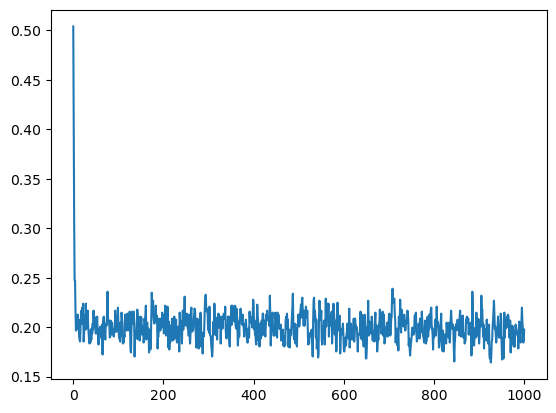

In [6]:
plt.plot(df_ag.loc[23].rho)
# plt.plot(df_tr.loc[23].rho)

# df_rho.loc[18].rho[:10] * 94933, 94933*0.65, 94933*0.92

# Error functions

That are used in finding parameters closest to real network stats. 

```Theoretically, it is not needed here. `transform_data` might be useful though. ```

In [14]:

n2_triads = ["tr1", "tr2", "tr4"]
n1_triads = ["tr3", "tr5", "tr6"]
deg_triads = [*n1_triads, *n2_triads]
all_triads = ["tr" + str(i) for i in range(8)]

# def normalize(data):
#     triads = ["tr" + str(i) for i in range(8)]
#     if data.shape[0] > 1:
#         if data.shape[1] > 1:
#             return data[triads].values.transpose() / np.sum(data[triads], axis=1).values
#     return ValueError("Not implemented")

def transform_data(data, triads = None, triads_groups = None):
    if triads_groups is None:
        T = len(triads)
        if data.shape[0] > 1:
            if data.shape[1] > 1:
                return data[triads].values.transpose() / np.sum(data[triads], axis=1).values - 1/T
            else:
                return data[triads] / np.sum(data[triads]) - 1/T
        else:
            return data[triads] / np.sum(data[triads], axis=1).values[0] - 1/T
    else:
        if type(data) == pd.DataFrame:
            df = data.copy(deep=True)
            for triads in triads_groups:
                nn = transform_data(data, triads)
                
                if np.where(np.array(nn.shape) == 3)[0][0] == 0:
                    nn = nn.transpose()

                new_df = pd.DataFrame(nn, index = data.index, columns=triads)
                df.update(new_df)
            df = df.drop(columns=['tr0', 'tr7'])
            return df
        else:
            ValueError("Not implemented")

def closest_to_six_triads(original_data, model_data):
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum((model_data[deg_triads].transpose() - original_data[deg_triads].values)**2, axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            err = (model_data[deg_triads].subtract(original_data[deg_triads].values)**2).sum(axis=1, min_count=1)
            return err
    
    if any(np.isnan(original_data[deg_triads])):
        return np.nan
    
    err = 0
    for triad in deg_triads:
        err += (original_data[triad] - model_data[triad])**2
    return err

def closest_to_six_triads_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        return closest_to_six_triads(original_data, model_data)
    
    
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            raise ValueError("Not implemented")
        elif type(model_data) == pd.DataFrame:
            original_data_trans = transform_data(original_data, triads_groups=(n1_triads, n2_triads))
            model_data_trans = transform_data(model_data, triads_groups=(n1_triads, n2_triads))
    
            return closest_to_six_triads(original_data_trans, model_data_trans)
    
    # model    
    p1_r = transform_data(original_data, n1_triads)
    p1_m = transform_data(model_data, n1_triads)
    # p1_m = pd.DataFrame(p1_m.transpose(), columns = n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    # p2_m = pd.DataFrame(p2_m.transpose(), columns = n1_triads)
    
    
    err = np.sum((p1_r - p1_m)**2, axis = 1).values[0]
    err += np.sum((p2_r - p2_m)**2, axis = 1).values[0]
    
    return err

def closest_to_four_triads(original_data, model_data):
    triads = ["tr1", "tr2", "tr5", "tr6"]
    
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum((model_data[triads].transpose() - original_data[triads].values)**2, axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            err = (model_data[triads].subtract(original_data[triads].values)**2).sum(min_count=1, axis=1)
            return err
    
    if any(np.isnan(original_data[triads])):
        return np.nan
    
    err = np.sum((original_data[triads] - model_data[triads])**2, axis = 1).values[0]
    return err

def closest_to_four_triads_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        return closest_to_four_triads(original_data, model_data)
    
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            raise ValueError("Not implemented")
        elif type(model_data) == pd.DataFrame:
            original_data_trans = transform_data(original_data, triads_groups=(n1_triads, n2_triads))
            model_data_trans = transform_data(model_data, triads_groups=(n1_triads, n2_triads))
    
            return closest_to_four_triads(original_data_trans, model_data_trans)
    
    
    p1_r = transform_data(original_data, n1_triads)
    p1_m = transform_data(model_data, n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    
    triads2 = ["tr1", "tr2"]
    triads1 = ["tr5", "tr6"]
    
    err = np.sum((p1_r[triads1] - p1_m[triads1])**2, axis = 1).values[0]
    err += np.sum((p2_r[triads2] - p2_m[triads2])**2, axis = 1).values[0]
    
    return err

def closest_to_high_underrepresentation(original_data, model_data):
    triads = ["tr2"]
    
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum((model_data[triads].transpose() - original_data[triads].values)**2, axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            err = (model_data[triads].subtract(original_data[triads].values)**2).sum(min_count=1, axis=1)
            return err
    
    if any(np.isnan(original_data[triads])):
        return np.nan
    
    err = 0
    err += (original_data["tr2"] - model_data["tr2"])**2
    return err

def closest_to_high_underrepresentation_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        return closest_to_high_underrepresentation(original_data, model_data)
    
    # p1_r = transform_data(original_data, n1_triads)
    # p1_m = transform_data(model_data, n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    
    if any(np.isnan(p2_r[["tr2"]])):
        return np.nan
    
    err = 0
    err += np.sum((p2_r["tr2"] - p2_m["tr2"])**2)
    return err

def closest_to_rho(original_data, model_data):
    if type(original_data) == pd.DataFrame:
        if type(model_data) == pd.DataFrame:
            err = model_data["rho"].subtract(original_data["rho"].values[0])**2
            return err
    
    err = 0
    err += (original_data["rho"] - model_data["rho"])**2
    return err

"""New error functions"""

"""Assuming we must have proper sign of deviations. """

def closest_to_six_triads_corrdevs_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        
        err = closest_to_four_triads(original_data, model_data)
        err += np.sum(model_data[deg_triads] * (original_data[deg_triads].values)  > 0, axis = 1) != 6
        return err
    
    raise ValueError("Not implemented")

    p1_r = transform_data(original_data, n1_triads)
    p1_m = transform_data(model_data, n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    
    err = np.sum((p1_r - p1_m)**2, axis = 1).values[0]
    err += np.sum((p2_r - p2_m)**2, axis = 1).values[0]
    
    return err

def closest_to_four_triads_corrdevs_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        triads = ["tr1", "tr2", "tr5", "tr6"]
        err = closest_to_four_triads(original_data, model_data)
        err += np.sum(model_data[triads] * (original_data[triads].values)  > 0, axis = 1) != 4
        return err
    
    raise ValueError("Not implemented")
    
    p1_r = transform_data(original_data, n1_triads)
    p1_m = transform_data(model_data, n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    
    triads2 = ["tr1", "tr2"]
    triads1 = ["tr5", "tr6"]
    
    err = np.sum((p1_r[triads1] - p1_m[triads1])**2, axis = 1).values[0]
    err += np.sum((p2_r[triads2] - p2_m[triads2])**2, axis = 1).values[0]
    
    return err


"""Combination of triad densities and rho"""

def closest_to_six_triads_rho(original_data, model_data, rho_factor = 5):
    return closest_to_six_triads(original_data, model_data) + closest_to_rho(original_data, model_data) * rho_factor

def closest_to_six_triads_rho_transformed(original_data, model_data, is_data_transformed = False, rho_factor = 5):
    return closest_to_six_triads_transformed(original_data, model_data, is_data_transformed) + closest_to_rho(original_data, model_data) * rho_factor

def closest_to_four_triads_rho(original_data, model_data, rho_factor = 5):
    return closest_to_four_triads(original_data, model_data) + closest_to_rho(original_data, model_data) * rho_factor

def closest_to_four_triads_rho_transformed(original_data, model_data, is_data_transformed = False, rho_factor = 5):
    return closest_to_four_triads_transformed(original_data, model_data, is_data_transformed) + closest_to_rho(original_data, model_data) * rho_factor

"""Not MSE, but relative error. In this way differences for different triads will weight the same. """
def closest_to_six_triads_relative(original_data, model_data):
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum(ap.abs((model_data[deg_triads].transpose() - original_data[deg_triads].values)/ original_data[deg_triads].values), axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            # err = np.sum(np.abs(model_data[deg_triads].subtract(original_data[deg_triads].values) / original_data[deg_triads].values), axis=1)
            err = (np.abs(model_data[deg_triads].subtract(original_data[deg_triads].values) / original_data[deg_triads].values)).sum(min_count=1, axis=1)
            return err
    
    if any(np.isnan(original_data[deg_triads])):
        return np.nan
    
    err = 0
    for triad in deg_triads:
        err += (np.abs((original_data[triad] - model_data[triad]) / original_data[triad])).values[0]
    return err

"""Not MSE, but relative error. In this way differences for different triads will weight the same. """
def closest_to_four_triads_relative(original_data, model_data):
    triads = ["tr1", "tr2", "tr5", "tr6"]

    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum(np.abs((model_data[triads].transpose() - original_data[triads].values)/ original_data[triads].values), axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            # err = np.sum(np.abs(model_data[deg_triads].subtract(original_data[deg_triads].values) / original_data[deg_triads].values), axis=1)
            err = (np.abs(model_data[triads].subtract(original_data[triads].values) / original_data[triads].values)).sum(min_count=1, axis=1)
            return err
    
    if any(np.isnan(original_data[triads])):
        return np.nan
    
    err = 0
    for triad in triads:
        err += (np.abs((original_data[triad] - model_data[triad]) / original_data[triad])).values[0]
    return err

error_functions = [closest_to_rho, closest_to_high_underrepresentation, closest_to_high_underrepresentation_transformed, 
                   closest_to_four_triads, closest_to_four_triads_transformed, closest_to_six_triads, closest_to_six_triads_transformed]
error_functions.extend([closest_to_six_triads_corrdevs_transformed, closest_to_four_triads_corrdevs_transformed, 
                        closest_to_six_triads_rho, closest_to_six_triads_rho_transformed, closest_to_four_triads_rho, closest_to_four_triads_rho_transformed,
                        closest_to_six_triads_relative, closest_to_four_triads_relative])

# error_functions = [closest_to_rho, closest_to_high_underrepresentation, closest_to_high_underrepresentation_transformed, 
#                    closest_to_four_triads, closest_to_four_triads_transformed, closest_to_six_triads, closest_to_six_triads_transformed]

In [49]:

# df_ag_trans = transform_data(df_ag, triads_groups = (n1_triads, n2_triads))
# df_rho_trans = df_ag_trans
# df_tr_trans = transform_data(df_tr, triads_groups = (n1_triads, n2_triads))


In [13]:
n1_triads = ['tr3', 'tr5', 'tr6']
n1_nohierarchical = 'tr5'
n2_triads = ['tr1', 'tr2', 'tr4']
n2_nonhierarchical = 'tr2'

triad_names_map={
    'tr7': 'BH0',
    'tr4': 'BH1',
    'tr1': 'BH2',
    'tr2': 'BN1',
    'tr0': 'UH2',
    'tr3': 'UH1',
    'tr5': 'UN1',
    'tr6': 'UH0',
}
triad_names_map.update({value: key for key, value in triad_names_map.items()})


## Finding quasi-stationary level

In [3]:
try:
    path = Path(outputs_cmpl, "qs_levels_reps.h5")
    df2_ag = pd.read_hdf(path, key = "df2_rho")
    save_df2 = False
except FileNotFoundError:
    print("FileNotFoundError")
    df2_ag = get_quasilevels2(df_rho, ini_beg = 100)
    save_df2 = True
print(len(df2_ag))
# df2_rho = df2_ag
df2_ag.head(5)
    

3025


,q,p,ps,rho_init,steps,cur_steps,rho,tr0,tr1,tr2,...,tr6_qs4_m,tr6_qs4_s,tr7_qs_m,tr7_qs_s,tr7_qs2_m,tr7_qs2_s,tr7_qs3_m,tr7_qs3_s,tr7_qs4_m,tr7_qs4_s
0,0.95,0.9,0.0,0.5,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.501008064516129, 0.30544354838709675, 0.171...","[0.12526881720430108, 0.3379032258064516, 0.57...","[0.12331989247311828, 0.1465725806451613, 0.11...","[0.1247983870967742, 0.14485887096774194, 0.11...",...,0.002175,0.000701,0.000108,0.000079,0.000109,0.000079,0.000108,0.000079,0.000108,0.000079
1,0.80,0.9,0.4,0.5,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.501008064516129, 0.5020161290322581, 0.5030...","[0.12526881720430108, 0.12493279569892474, 0.1...","[0.12331989247311828, 0.12950268817204302, 0.1...","[0.1247983870967742, 0.121875, 0.1173387096774...",...,0.136272,0.008347,0.157164,0.030080,0.155263,0.030026,0.155505,0.028986,0.154882,0.028861
2,0.10,1.0,0.8,0.5,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5030241935483871, 0.6935483870967742, 0.817...","[0.12328629032258065, 0.02987231182795699, 0.0...","[0.12281586021505377, 0.0636760752688172, 0.02...","[0.12456317204301075, 0.06579301075268817, 0.0...",...,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000
3,0.10,0.8,0.1,0.5,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.501008064516129, 0.5826612903225806, 0.6401...","[0.12526881720430108, 0.0729502688172043, 0.04...","[0.12331989247311828, 0.10467069892473119, 0.0...","[0.1247983870967742, 0.09879032258064516, 0.08...",...,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000
4,0.80,0.4,0.0,0.5,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.501008064516129, 0.33064516129032256, 0.261...","[0.12526881720430108, 0.2994623655913978, 0.40...","[0.12331989247311828, 0.1478494623655914, 0.14...","[0.1247983870967742, 0.14936155913978494, 0.14...",...,0.022488,0.002740,0.004529,0.000942,0.004580,0.001080,0.004532,0.000943,0.004532,0.000943


In [62]:
#In the case of new simulations

if len(df2_rho) != len(df_rho):
    new_inds = []
    old_inds = []
    ind_map = {}

    for ind, row in df_rho.iterrows():
        q = row.q
        p = row.p
        ps = row.ps
        rho_init = row.rho_init
        
        ind_t = np.where((df2_rho.q == q) & (df2_rho.p == p) & (df2_rho.ps == ps) & (df2_rho.rho_init == rho_init))[0]
        
        if len(ind_t) > 0:
            if len(ind_t) > 1:
                minds = np.copy(ind_t)
                found = False
                for ind_ in minds:
                    if np.array_equal(row.rho, df2_rho.loc[ind_].rho):
                    # if np.all(row.rho == df2_joined.loc[ind_].rho):
                        ind_t = ind_
                        found = True
                        break
                if not found:
                    print((ind, ind_t))
            else:
                ind_t = ind_t[0]
            old_inds.append(ind)
            ind_map[ind] = ind_t
        else:
            new_inds.append(ind)
            # print((ind,))
    
    print(len(new_inds))
    print(len(old_inds))

0
2783


In [63]:
if len(df2_rho) != len(df_rho):
    df_temp = df_rho.loc[new_inds].copy(deep=True)
    df_temp.index.name = "level_1"
    df_temp.reset_index(inplace=True)
    
    df2_temp = get_quasilevels2(df_temp)
    
    len(df2_temp)
    df2_temp.head()

ValueError: Wrong number of items passed 17, placement implies 1

In [ ]:
if len(df2_rho) != len(df_rho):
    df2_rho = pd.concat([df2_rho, df2_temp])
    print(len(df2_rho) )
    save_df2 = True

RangeIndex(start=0, stop=363, step=1)

In [93]:
# df2_ag.reset_index(drop = True, inplace = True)
# # df2_tr.reset_index(drop = True, inplace = True)
# df2_ag=df2_ag.drop(columns = ["index"])

KeyError: "['index'] not found in axis"

### Correcting numerical errors in parameter values

It happens that ps is 0.7 or 0.700000001 etc. It causes problems in later `group` method. 

In [53]:
# for ind, row in df2_ag.iterrows():
#     q = round(row.q, 5)
#     psbt = round(row.p, 5)
#     pst = round(row.ps, 5)
#     rho_init = round(row.rho_init, 5)
    
#     df2_ag.at[ind, "q"] = q
#     df2_ag.at[ind, "p"] = psbt
#     df2_ag.at[ind, "ps"] = pst
#     df2_ag.at[ind, "rho_init"] = rho_init

# for ind, row in df2_tr.iterrows():
#     q = round(row.q, 5)
#     psbt = round(row.p, 5)
#     pst = round(row.ps, 5)
#     rho_init = round(row.rho_init, 5)
    
#     df2_tr.at[ind, "q"] = q
#     df2_tr.at[ind, "p"] = psbt
#     df2_tr.at[ind, "ps"] = pst
#     df2_tr.at[ind, "rho_init"] = rho_init


In [94]:
if save_df2:
    path = Path(outputs_cmpl,"qs_levels_reps.h5")
    df2_ag.to_hdf(path, key = 'df2_rho')
    save_df2 = False
    
# if save_df2_tr:
#     path = Path(outputs_cmpl2,"qs_levels2.h5")
#     df2_tr.to_hdf(path, key = 'df2_rho')
#     save_df2 = False

/home/pgorski/.local/lib/python3.8/site-packages/pandas/core/generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['cur_steps', 'rho', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4', 'tr5', 'tr6',
       'tr7', 'Lplus'],
      dtype='object')]

  pytables.to_hdf(


In [4]:
chosen_cols = ['q', 'p', 'ps', 'rho_qs_m',
       'rho_qs_s', 'rho_qs_b', 'rho_qs_f', 'rho_qs2_m', 'rho_qs2_s',
       'rho_qs2_b', 'rho_qs2_f']

df2_ag[['q', 'p', 'ps', 'rho_qs_m',
       'rho_qs_s', 'rho_qs_b', 'rho_qs_f', 'rho_qs3_m', 'rho_qs3_s',
       'rho_qs3_b', 'rho_qs3_f']]

,q,p,ps,rho_qs_m,rho_qs_s,rho_qs_b,rho_qs_f,rho_qs3_m,rho_qs3_s,rho_qs3_b,rho_qs3_f
0,0.95,0.9,0.0,0.047791,0.006471,100.0,1001.0,0.047791,0.006471,100.0,1001.0
1,0.80,0.9,0.4,0.527432,0.034651,102.0,1001.0,0.525646,0.033774,144.0,1001.0
2,0.10,1.0,0.8,NaN,NaN,NaN,NaN,1.000000,0.000000,102.0,1001.0
3,0.10,0.8,0.1,NaN,NaN,NaN,NaN,1.000000,0.000000,102.0,1001.0
4,0.80,0.4,0.0,0.164797,0.010262,101.0,1000.0,0.164828,0.010272,100.0,1001.0
...,...,...,...,...,...,...,...,...,...,...,...
3020,0.95,0.6,0.8,NaN,NaN,NaN,NaN,1.000000,0.000000,102.0,1001.0
3021,0.95,0.9,0.8,NaN,NaN,NaN,NaN,1.000000,0.000000,102.0,1001.0
3022,0.95,0.1,0.4,0.178450,0.018817,101.0,1000.0,0.178378,0.018866,100.0,1001.0
3023,0.95,0.6,0.7,NaN,NaN,NaN,NaN,1.000000,0.000000,102.0,1001.0


In [97]:
np.unique(df2_ag.q)

array([0.1 , 0.8 , 0.95])

In [5]:
# df2_ag.reset_index(inplace=True, drop=True)
# df2_ag.drop(columns="index", inplace=True)

len(df2_ag.index.values), len(np.unique(df2_ag.index.values))

(3025, 3025)

In [6]:
inds = [row.cur_steps[-1] == row.steps for ind,row in df2_ag.iterrows()]

df2_ag_correct = df2_ag.iloc[inds]
df2_ag_correct.reset_index(drop = True, inplace = True)

# inds = [row.cur_steps[-1] == row.steps for ind,row in df2_tr.iterrows()]

# df2_tr_correct = df2_tr.iloc[inds]
# df2_tr_correct.reset_index(drop = True, inplace = True)
len(df2_ag_correct)
# , len(df2_tr_correct)

3025

In [7]:
df2_ag_g = group_quasilevels2(df2_ag, cols = ['q', 'p', 'ps', 'rho_init'])
df2_ag_g

/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/Desktop/programming/toolbox/complex-system-toolbox/experiments/phase_transit

q    p   ps  rho_init  repetitions   rho_lvl  \
0.10 0.0 0.0 0.5  0.10  0.0  0.0       0.5            1  0.353847   
         0.1 0.5  0.10  0.0  0.1       0.5            1  0.356416   
         0.2 0.5  0.10  0.0  0.2       0.5            1  0.358139   
         0.3 0.5  0.10  0.0  0.3       0.5            1  0.360675   
         0.4 0.5  0.10  0.0  0.4       0.5            1  0.363637   
...                ...  ...  ...       ...          ...       ...   
0.95 1.0 0.6 0.5  0.95  1.0  0.6       0.5           12       NaN   
         0.7 0.5  0.95  1.0  0.7       0.5           12       NaN   
         0.8 0.5  0.95  1.0  0.8       0.5           12       NaN   
         0.9 0.5  0.95  1.0  0.9       0.5           12       NaN   
         1.0 0.5  0.95  1.0  1.0       0.5           12       NaN   

                  rho_lvl_std  rho_lvl_valid  rho_sim_std  rho_lvl2  ...  \
0.10 0.0 0.0 0.5          0.0              1     0.010443  0.353947  ...   
         0.1 0.5          0.0              1     0.010780  0.356556  ...   
         0.2 0.5          0.0              1     0.010785  0.358264  ...   
         0.3 0.5          0.0              1     0.010828  0.360686  ...   
         0.4 0.5          0.0              1     0.010882  0.363774  ...   
...                       ...            ...          ...       ...  ...   
0.95 1.0 0.6 0.5          NaN              0          NaN       NaN  ...   
         0.7 0.5          NaN              0          NaN       NaN  ...   
         0.8 0.5          NaN              0          NaN       NaN  ...   
         0.9 0.5          NaN              0          NaN       NaN  ...   
         1.0 0.5          NaN              0          NaN       NaN  ...   

                  tr4_sim_std4  tr5_lvl4  tr5_lvl4_std  tr5_sim_std4  \
0.10 0.0 0.0 0.5      0.001400  0.080804           0.0      0.003692   
         0.1 0.5      0.001424  0.081564           0.0      0.003768   
         0.2 0.5      0.001468  0.082096           0.0      0.003902   
         0.3 0.5      0.001474  0.082929           0.0      0.003789   
         0.4 0.5      0.001565  0.083833           0.0      0.003935   
...                        ...       ...           ...           ...   
0.95 1.0 0.6 0.5           NaN       NaN           NaN           NaN   
         0.7 0.5           NaN       NaN           NaN           NaN   
         0.8 0.5           NaN       NaN           NaN           NaN   
         0.9 0.5           NaN       NaN           NaN           NaN   
         1.0 0.5           NaN       NaN           NaN           NaN   

                  tr6_lvl4  tr6_lvl4_std  tr6_sim_std4  tr7_lvl4  \
0.10 0.0 0.0 0.5  0.079667           0.0      0.003646  0.043663   
         0.1 0.5  0.080477           0.0      0.003737  0.044680   
         0.2 0.5  0.081134           0.0      0.003765  0.045328   
         0.3 0.5  0.082060           0.0      0.003830  0.046329   
         0.4 0.5  0.083069           0.0      0.003842  0.047553   
...                    ...           ...           ...       ...   
0.95 1.0 0.6 0.5       NaN           NaN           NaN       NaN   
         0.7 0.5       NaN           NaN           NaN       NaN   
         0.8 0.5       NaN           NaN           NaN       NaN   
         0.9 0.5       NaN           NaN           NaN       NaN   
         1.0 0.5       NaN           NaN           NaN       NaN   

                  tr7_lvl4_std  tr7_sim_std4  
0.10 0.0 0.0 0.5           0.0      0.004045  
         0.1 0.5           0.0      0.004223  
         0.2 0.5           0.0      0.004215  
         0.3 0.5           0.0      0.004308  
         0.4 0.5           0.0      0.004382  
...                        ...           ...  
0.95 1.0 0.6 0.5           NaN           NaN  
         0.7 0.5           NaN           NaN  
         0.8 0.5           NaN           NaN  
         0.9 0.5           NaN           NaN  
         1.0 0.5           NaN           NaN  

[363 rows x 94 columns]

In [8]:
df2_ag_correct_g = group_quasilevels2(df2_ag_correct, cols = ['q', 'p', 'ps', 'rho_init'])
df2_ag_correct_g

/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/Desktop/programming/toolbox/complex-system-toolbox/experiments/phase_transit

q    p   ps  rho_init  repetitions   rho_lvl  \
0.10 0.0 0.0 0.5  0.10  0.0  0.0       0.5            1  0.353847   
         0.1 0.5  0.10  0.0  0.1       0.5            1  0.356416   
         0.2 0.5  0.10  0.0  0.2       0.5            1  0.358139   
         0.3 0.5  0.10  0.0  0.3       0.5            1  0.360675   
         0.4 0.5  0.10  0.0  0.4       0.5            1  0.363637   
...                ...  ...  ...       ...          ...       ...   
0.95 1.0 0.6 0.5  0.95  1.0  0.6       0.5           12       NaN   
         0.7 0.5  0.95  1.0  0.7       0.5           12       NaN   
         0.8 0.5  0.95  1.0  0.8       0.5           12       NaN   
         0.9 0.5  0.95  1.0  0.9       0.5           12       NaN   
         1.0 0.5  0.95  1.0  1.0       0.5           12       NaN   

                  rho_lvl_std  rho_lvl_valid  rho_sim_std  rho_lvl2  ...  \
0.10 0.0 0.0 0.5          0.0              1     0.010443  0.353947  ...   
         0.1 0.5          0.0              1     0.010780  0.356556  ...   
         0.2 0.5          0.0              1     0.010785  0.358264  ...   
         0.3 0.5          0.0              1     0.010828  0.360686  ...   
         0.4 0.5          0.0              1     0.010882  0.363774  ...   
...                       ...            ...          ...       ...  ...   
0.95 1.0 0.6 0.5          NaN              0          NaN       NaN  ...   
         0.7 0.5          NaN              0          NaN       NaN  ...   
         0.8 0.5          NaN              0          NaN       NaN  ...   
         0.9 0.5          NaN              0          NaN       NaN  ...   
         1.0 0.5          NaN              0          NaN       NaN  ...   

                  tr4_sim_std4  tr5_lvl4  tr5_lvl4_std  tr5_sim_std4  \
0.10 0.0 0.0 0.5      0.001400  0.080804           0.0      0.003692   
         0.1 0.5      0.001424  0.081564           0.0      0.003768   
         0.2 0.5      0.001468  0.082096           0.0      0.003902   
         0.3 0.5      0.001474  0.082929           0.0      0.003789   
         0.4 0.5      0.001565  0.083833           0.0      0.003935   
...                        ...       ...           ...           ...   
0.95 1.0 0.6 0.5           NaN       NaN           NaN           NaN   
         0.7 0.5           NaN       NaN           NaN           NaN   
         0.8 0.5           NaN       NaN           NaN           NaN   
         0.9 0.5           NaN       NaN           NaN           NaN   
         1.0 0.5           NaN       NaN           NaN           NaN   

                  tr6_lvl4  tr6_lvl4_std  tr6_sim_std4  tr7_lvl4  \
0.10 0.0 0.0 0.5  0.079667           0.0      0.003646  0.043663   
         0.1 0.5  0.080477           0.0      0.003737  0.044680   
         0.2 0.5  0.081134           0.0      0.003765  0.045328   
         0.3 0.5  0.082060           0.0      0.003830  0.046329   
         0.4 0.5  0.083069           0.0      0.003842  0.047553   
...                    ...           ...           ...       ...   
0.95 1.0 0.6 0.5       NaN           NaN           NaN       NaN   
         0.7 0.5       NaN           NaN           NaN       NaN   
         0.8 0.5       NaN           NaN           NaN       NaN   
         0.9 0.5       NaN           NaN           NaN       NaN   
         1.0 0.5       NaN           NaN           NaN       NaN   

                  tr7_lvl4_std  tr7_sim_std4  
0.10 0.0 0.0 0.5           0.0      0.004045  
         0.1 0.5           0.0      0.004223  
         0.2 0.5           0.0      0.004215  
         0.3 0.5           0.0      0.004308  
         0.4 0.5           0.0      0.004382  
...                        ...           ...  
0.95 1.0 0.6 0.5           NaN           NaN  
         0.7 0.5           NaN           NaN  
         0.8 0.5           NaN           NaN  
         0.9 0.5           NaN           NaN  
         1.0 0.5           NaN           NaN  

[363 rows x 94 columns]

In [9]:
df2_ag_g.equals(df2_ag_correct_g)
# , df2_tr_g.equals(df2_tr_correct_g)

True

In [24]:
i = 0
qf = 0.8
psbtf = 1.
pstf = 0.9

In [21]:
cols = ['q', 'p', 'ps', 'rho_init']
inds = []
i=0
for group in df2_rho_correct.groupby(cols):
    (group_label, df_temp) = group
    q, psb, ps, _ = group_label
    if ((np.abs(q - qf) < 1e-5) & (np.abs(psb - psbtf) < 1e-5) & (np.abs(ps - pstf) < 1e-5)):
        inds.append(i)
    i += 1
q, psb, ps  , i, inds

(0.95, 1.0, 1.0, 363, [240])

In [68]:
groups = list(df2_rho_correct.groupby(cols))

In [22]:
print(len(df2_rho_correct.index))
q = 0.8
psbt = 1.
pst = 0.9
inds = np.where((np.abs(df2_rho_correct.q - q) < 1e-5) & (np.abs(df2_rho_correct.p - psbt) < 1e-5) & (np.abs(df2_rho_correct.ps - pst) < 1e-5))[0]
df2_rho_correct.iloc[inds]
# df2_erho_correct

363


,q,p,ps,rho_init,steps,cur_steps,rho,tr0,tr1,tr2,...,tr6_qs4_m,tr6_qs4_s,tr7_qs_m,tr7_qs_s,tr7_qs2_m,tr7_qs2_s,tr7_qs3_m,tr7_qs3_s,tr7_qs4_m,tr7_qs4_s
73,0.8,1.0,0.9,0.5,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5030241935483871, 0.6854838709677419, 0.810...","[0.12328629032258065, 0.03286290322580645, 0.0...","[0.12281586021505377, 0.07083333333333333, 0.0...","[0.12456317204301075, 0.06609543010752689, 0.0...",...,0.0,0.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0


In [78]:
inds = np.isnan(df2_ag_correct_g.rho_lvl4)
df2_ag_correct_g.loc[inds]
# inds

q    p   ps  rho_init  repetitions  rho_lvl  rho_lvl_std  \
0.10 0.8 0.0 0.5  0.10  0.8  0.0       0.5            1      NaN          NaN   
         0.1 0.5  0.10  0.8  0.1       0.5            1      NaN          NaN   
         0.2 0.5  0.10  0.8  0.2       0.5            1      NaN          NaN   
         0.3 0.5  0.10  0.8  0.3       0.5            1      NaN          NaN   
         0.4 0.5  0.10  0.8  0.4       0.5            1      NaN          NaN   
...                ...  ...  ...       ...          ...      ...          ...   
0.95 1.0 0.6 0.5  0.95  1.0  0.6       0.5           11      NaN          NaN   
         0.7 0.5  0.95  1.0  0.7       0.5           11      NaN          NaN   
         0.8 0.5  0.95  1.0  0.8       0.5           11      NaN          NaN   
         0.9 0.5  0.95  1.0  0.9       0.5           11      NaN          NaN   
         1.0 0.5  0.95  1.0  1.0       0.5           11      NaN          NaN   

                  rho_lvl_valid  rho_sim_std  rho_lvl2  ...  tr4_sim_std4  \
0.10 0.8 0.0 0.5              0          NaN       NaN  ...           NaN   
         0.1 0.5              0          NaN       NaN  ...           NaN   
         0.2 0.5              0          NaN       NaN  ...           NaN   
         0.3 0.5              0          NaN       NaN  ...           NaN   
         0.4 0.5              0          NaN       NaN  ...           NaN   
...                         ...          ...       ...  ...           ...   
0.95 1.0 0.6 0.5              0          NaN       NaN  ...           NaN   
         0.7 0.5              0          NaN       NaN  ...           NaN   
         0.8 0.5              0          NaN       NaN  ...           NaN   
         0.9 0.5              0          NaN       NaN  ...           NaN   
         1.0 0.5              0          NaN       NaN  ...           NaN   

                  tr5_lvl4  tr5_lvl4_std  tr5_sim_std4  tr6_lvl4  \
0.10 0.8 0.0 0.5       NaN           NaN           NaN       NaN   
         0.1 0.5       NaN           NaN           NaN       NaN   
         0.2 0.5       NaN           NaN           NaN       NaN   
         0.3 0.5       NaN           NaN           NaN       NaN   
         0.4 0.5       NaN           NaN           NaN       NaN   
...                    ...           ...           ...       ...   
0.95 1.0 0.6 0.5       NaN           NaN           NaN       NaN   
         0.7 0.5       NaN           NaN           NaN       NaN   
         0.8 0.5       NaN           NaN           NaN       NaN   
         0.9 0.5       NaN           NaN           NaN       NaN   
         1.0 0.5       NaN           NaN           NaN       NaN   

                  tr6_lvl4_std  tr6_sim_std4  tr7_lvl4  tr7_lvl4_std  \
0.10 0.8 0.0 0.5           NaN           NaN       NaN           NaN   
         0.1 0.5           NaN           NaN       NaN           NaN   
         0.2 0.5           NaN           NaN       NaN           NaN   
         0.3 0.5           NaN           NaN       NaN           NaN   
         0.4 0.5           NaN           NaN       NaN           NaN   
...                        ...           ...       ...           ...   
0.95 1.0 0.6 0.5           NaN           NaN       NaN           NaN   
         0.7 0.5           NaN           NaN       NaN           NaN   
         0.8 0.5           NaN           NaN       NaN           NaN   
         0.9 0.5           NaN           NaN       NaN           NaN   
         1.0 0.5           NaN           NaN       NaN           NaN   

                  tr7_sim_std4  
0.10 0.8 0.0 0.5           NaN  
         0.1 0.5           NaN  
         0.2 0.5           NaN  
         0.3 0.5           NaN  
         0.4 0.5           NaN  
...                        ...  
0.95 1.0 0.6 0.5           NaN  
         0.7 0.5           NaN  
         0.8 0.5           NaN  
         0.9 0.5           NaN  
         1.0 0.5           NaN  

[127 rows x 94 columns]

In [80]:
q = 0.8
inds = np.isnan(df2_ag_correct_g.rho_lvl4) & (np.abs(df2_ag_correct_g.q - q) < 1e-5)
df2_ag_correct_g.loc[inds]

q    p   ps  rho_init  repetitions  rho_lvl  rho_lvl_std  \
0.8 0.0 1.0 0.5  0.8  0.0  1.0       0.5           11      NaN          NaN   
    0.1 0.9 0.5  0.8  0.1  0.9       0.5           11      NaN          NaN   
        1.0 0.5  0.8  0.1  1.0       0.5           11      NaN          NaN   
    0.2 0.8 0.5  0.8  0.2  0.8       0.5           11      NaN          NaN   
        0.9 0.5  0.8  0.2  0.9       0.5           11      NaN          NaN   
        1.0 0.5  0.8  0.2  1.0       0.5           11      NaN          NaN   
    0.3 0.8 0.5  0.8  0.3  0.8       0.5           11      NaN          NaN   
        0.9 0.5  0.8  0.3  0.9       0.5           11      NaN          NaN   
        1.0 0.5  0.8  0.3  1.0       0.5           11      NaN          NaN   
    0.4 0.8 0.5  0.8  0.4  0.8       0.5           11      NaN          NaN   
        0.9 0.5  0.8  0.4  0.9       0.5           11      NaN          NaN   
        1.0 0.5  0.8  0.4  1.0       0.5           11      NaN          NaN   
    0.5 0.7 0.5  0.8  0.5  0.7       0.5           11      NaN          NaN   
        0.8 0.5  0.8  0.5  0.8       0.5           11      NaN          NaN   
        0.9 0.5  0.8  0.5  0.9       0.5           11      NaN          NaN   
        1.0 0.5  0.8  0.5  1.0       0.5           11      NaN          NaN   
    0.6 0.7 0.5  0.8  0.6  0.7       0.5           11      NaN          NaN   
        0.8 0.5  0.8  0.6  0.8       0.5           11      NaN          NaN   
        0.9 0.5  0.8  0.6  0.9       0.5           11      NaN          NaN   
        1.0 0.5  0.8  0.6  1.0       0.5           11      NaN          NaN   
    0.7 0.6 0.5  0.8  0.7  0.6       0.5           11      NaN          NaN   
        0.7 0.5  0.8  0.7  0.7       0.5           11      NaN          NaN   
        0.8 0.5  0.8  0.7  0.8       0.5           11      NaN          NaN   
        0.9 0.5  0.8  0.7  0.9       0.5           11      NaN          NaN   
        1.0 0.5  0.8  0.7  1.0       0.5           11      NaN          NaN   
    0.8 0.6 0.5  0.8  0.8  0.6       0.5           11      NaN          NaN   
        0.7 0.5  0.8  0.8  0.7       0.5           11      NaN          NaN   
        0.8 0.5  0.8  0.8  0.8       0.5           11      NaN          NaN   
        0.9 0.5  0.8  0.8  0.9       0.5           11      NaN          NaN   
        1.0 0.5  0.8  0.8  1.0       0.5           11      NaN          NaN   
    0.9 0.5 0.5  0.8  0.9  0.5       0.5           11      NaN          NaN   
        0.6 0.5  0.8  0.9  0.6       0.5           11      NaN          NaN   
        0.7 0.5  0.8  0.9  0.7       0.5           11      NaN          NaN   
        0.8 0.5  0.8  0.9  0.8       0.5           11      NaN          NaN   
        0.9 0.5  0.8  0.9  0.9       0.5           11      NaN          NaN   
        1.0 0.5  0.8  0.9  1.0       0.5           11      NaN          NaN   
    1.0 0.5 0.5  0.8  1.0  0.5       0.5           11      NaN          NaN   
        0.6 0.5  0.8  1.0  0.6       0.5           11      NaN          NaN   
        0.7 0.5  0.8  1.0  0.7       0.5           11      NaN          NaN   
        0.8 0.5  0.8  1.0  0.8       0.5           11      NaN          NaN   
        0.9 0.5  0.8  1.0  0.9       0.5           11      NaN          NaN   
        1.0 0.5  0.8  1.0  1.0       0.5           11      NaN          NaN   

                 rho_lvl_valid  rho_sim_std  rho_lvl2  ...  tr4_sim_std4  \
0.8 0.0 1.0 0.5              0          NaN       NaN  ...           NaN   
    0.1 0.9 0.5              0          NaN       NaN  ...           NaN   
        1.0 0.5              0          NaN       NaN  ...           NaN   
    0.2 0.8 0.5              0          NaN       NaN  ...           NaN   
        0.9 0.5              0          NaN       NaN  ...           NaN   
        1.0 0.5              0          NaN       NaN  ...           NaN   
    0.3 0.8 0.5              0          NaN       NaN  ...           NaN   
        0.9 0

Text(0.5, 1.0, 'q, psbt, pst = 0.8, 0.0, 0.9')

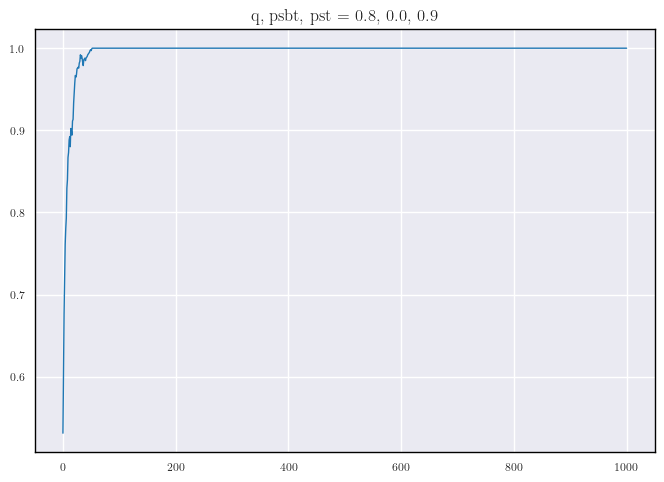

In [131]:
q = 0.8
p = 0.
ps = 0.9
rho_init = 0.5

ind_t = np.where( (np.abs(df2_ag_correct.q - q) < 1e-5) & (np.abs(df2_ag_correct.p - p ) < 1e-5) & 
                 (np.abs(df2_ag_correct.rho_init - rho_init) < 1e-5) & (np.abs(df2_ag_correct.ps - ps) < 1e-5))[0]


# df_one = df102.iloc[0].rho
df_one = df2_ag_correct.iloc[ind_t[6]].rho
# q = df_w1000.iloc[108].q
# p = df_w1000.iloc[108].p
# ps = df_w1000.iloc[108].ps
df_one
plt.plot(df_one)
plt.title('q, psbt, pst = ' + str(q) + ', ' + str(p) + ', ' + str(ps))

Text(0.5, 1.0, 'q, psbt, pst = 0.8, 0.0, 0.9')

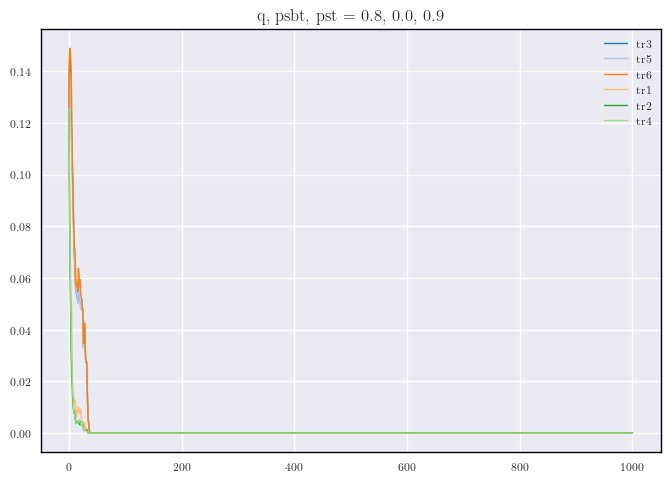

In [133]:
# df_one = df_w2.iloc[0].rho
# df_one
# plt.plot(df_one)

# plt.plot()

for triad in deg_triads:
    plt.plot(df2_ag_correct.iloc[ind_t[0]][triad])
    
plt.legend(deg_triads)
# plt.xscale('log')

plt.title('q, psbt, pst = ' + str(q) + ', ' + str(p) + ', ' + str(ps))

In [36]:
inds = np.isnan(df2_tr_correct_g.rho_lvl4)
df2_tr_correct_g.loc[inds]
# inds

q    p   ps  rho_init  repetitions  rho_lvl  rho_lvl_std  \
0.10 0.5 0.6 0.5  0.10  0.5  0.6       0.5            1      NaN          NaN   
         0.7 0.5  0.10  0.5  0.7       0.5            1      NaN          NaN   
         0.8 0.5  0.10  0.5  0.8       0.5            1      NaN          NaN   
         0.9 0.5  0.10  0.5  0.9       0.5            1      NaN          NaN   
         1.0 0.5  0.10  0.5  1.0       0.5            1      NaN          NaN   
...                ...  ...  ...       ...          ...      ...          ...   
0.95 1.0 0.6 0.5  0.95  1.0  0.6       0.5            1      NaN          NaN   
         0.7 0.5  0.95  1.0  0.7       0.5            1      NaN          NaN   
         0.8 0.5  0.95  1.0  0.8       0.5            1      NaN          NaN   
         0.9 0.5  0.95  1.0  0.9       0.5            1      NaN          NaN   
         1.0 0.5  0.95  1.0  1.0       0.5            1      NaN          NaN   

                  rho_lvl_valid  rho_sim_std  rho_lvl2  ...  tr4_sim_std4  \
0.10 0.5 0.6 0.5              0          NaN       NaN  ...           NaN   
         0.7 0.5              0          NaN       NaN  ...           NaN   
         0.8 0.5              0          NaN       NaN  ...           NaN   
         0.9 0.5              0          NaN       NaN  ...           NaN   
         1.0 0.5              0          NaN       NaN  ...           NaN   
...                         ...          ...       ...  ...           ...   
0.95 1.0 0.6 0.5              0          NaN       NaN  ...           NaN   
         0.7 0.5              0          NaN       NaN  ...           NaN   
         0.8 0.5              0          NaN       NaN  ...           NaN   
         0.9 0.5              0          NaN       NaN  ...           NaN   
         1.0 0.5              0          NaN       NaN  ...           NaN   

                  tr5_lvl4  tr5_lvl4_std  tr5_sim_std4  tr6_lvl4  \
0.10 0.5 0.6 0.5       NaN           NaN           NaN       NaN   
         0.7 0.5       NaN           NaN           NaN       NaN   
         0.8 0.5       NaN           NaN           NaN       NaN   
         0.9 0.5       NaN           NaN           NaN       NaN   
         1.0 0.5       NaN           NaN           NaN       NaN   
...                    ...           ...           ...       ...   
0.95 1.0 0.6 0.5       NaN           NaN           NaN       NaN   
         0.7 0.5       NaN           NaN           NaN       NaN   
         0.8 0.5       NaN           NaN           NaN       NaN   
         0.9 0.5       NaN           NaN           NaN       NaN   
         1.0 0.5       NaN           NaN           NaN       NaN   

                  tr6_lvl4_std  tr6_sim_std4  tr7_lvl4  tr7_lvl4_std  \
0.10 0.5 0.6 0.5           NaN           NaN       NaN           NaN   
         0.7 0.5           NaN           NaN       NaN           NaN   
         0.8 0.5           NaN           NaN       NaN           NaN   
         0.9 0.5           NaN           NaN       NaN           NaN   
         1.0 0.5           NaN           NaN       NaN           NaN   
...                        ...           ...       ...           ...   
0.95 1.0 0.6 0.5           NaN           NaN       NaN           NaN   
         0.7 0.5           NaN           NaN       NaN           NaN   
         0.8 0.5           NaN           NaN       NaN           NaN   
         0.9 0.5           NaN           NaN       NaN           NaN   
         1.0 0.5           NaN           NaN       NaN           NaN   

                  tr7_sim_std4  
0.10 0.5 0.6 0.5           NaN  
         0.7 0.5           NaN  
         0.8 0.5           NaN  
         0.9 0.5           NaN  
         1.0 0.5           NaN  
...                        ...  
0.95 1.0 0.6 0.5           NaN  
         0.7 0.5           NaN  
         0.8 0.5           NaN  
         0.9 0.5           NaN  
         1.0 0.5           NaN  

[175 rows x 94 columns]

In [27]:
df2_rho_g.columns

Index(['q', 'p', 'ps', 'rho_init', 'repetitions', 'rho_lvl', 'rho_lvl_std',
       'rho_lvl_valid', 'rho_sim_std', 'rho_lvl2', 'rho_lvl2_std',
       'rho_lvl2_valid', 'rho_sim_std2', 'rho_lvl3', 'rho_lvl3_std',
       'rho_lvl3_valid', 'rho_sim_std3', 'rho_lvl_exp', 'rho_lvl4',
       'rho_lvl4_std', 'rho_lvl4_valid', 'rho_sim_std4', 'tr0_lvl',
       'tr0_lvl_std', 'tr0_sim_std', 'tr1_lvl', 'tr1_lvl_std', 'tr1_sim_std',
       'tr2_lvl', 'tr2_lvl_std', 'tr2_sim_std', 'tr3_lvl', 'tr3_lvl_std',
       'tr3_sim_std', 'tr4_lvl', 'tr4_lvl_std', 'tr4_sim_std', 'tr5_lvl',
       'tr5_lvl_std', 'tr5_sim_std', 'tr6_lvl', 'tr6_lvl_std', 'tr6_sim_std',
       'tr7_lvl', 'tr7_lvl_std', 'tr7_sim_std', 'tr0_lvl3', 'tr0_lvl3_std',
       'tr0_sim_std3', 'tr1_lvl3', 'tr1_lvl3_std', 'tr1_sim_std3', 'tr2_lvl3',
       'tr2_lvl3_std', 'tr2_sim_std3', 'tr3_lvl3', 'tr3_lvl3_std',
       'tr3_sim_std3', 'tr4_lvl3', 'tr4_lvl3_std', 'tr4_sim_std3', 'tr5_lvl3',
       'tr5_lvl3_std', 'tr5_sim_std3', 'tr6_lvl

### Adjusting col names

In [10]:
"""Adjusting col names"""

for col in df2_ag_correct_g.columns:
    if col.endswith("_lvl4"):
        new_col = col.split("_lvl4")[0]
        df2_ag_correct_g[new_col] = df2_ag_correct_g[col]
        

# for col in df2_tr_correct_g.columns:
#     if col.endswith("_lvl4"):
#         new_col = col.split("_lvl4")[0]
#         df2_tr_correct_g[new_col] = df2_tr_correct_g[col]


In [11]:
df2_ag_correct_g[["rho_lvl", "rho_lvl2", "rho_lvl3", "rho_lvl4","rho"]]

rho_lvl  rho_lvl2  rho_lvl3  rho_lvl4       rho
0.10 0.0 0.0 0.5  0.353847  0.353947  0.353863  0.353863  0.353863
         0.1 0.5  0.356416  0.356556  0.356416  0.356416  0.356416
         0.2 0.5  0.358139  0.358264  0.358139  0.358139  0.358139
         0.3 0.5  0.360675  0.360686  0.360695  0.360695  0.360695
         0.4 0.5  0.363637  0.363774  0.363617  0.363617  0.363617
...                    ...       ...       ...       ...       ...
0.95 1.0 0.6 0.5       NaN       NaN       NaN       NaN       NaN
         0.7 0.5       NaN       NaN       NaN       NaN       NaN
         0.8 0.5       NaN       NaN       NaN       NaN       NaN
         0.9 0.5       NaN       NaN       NaN       NaN       NaN
         1.0 0.5       NaN       NaN       NaN       NaN       NaN

[363 rows x 5 columns]

In [15]:
df2_ag_correct_g_trans = transform_data(df2_ag_correct_g, triads_groups = (n1_triads, n2_triads))

# df2_tr_correct_g_trans = transform_data(df2_tr_correct_g, triads_groups = (n1_triads, n2_triads))


/tmp/ipykernel_207147/1357367912.py:18: RuntimeWarning: invalid value encountered in true_divide
  return data[triads].values.transpose() / np.sum(data[triads], axis=1).values - 1/T


# Plots

In [16]:


n1_triads = ['tr3', 'tr5', 'tr6']
n1_nonhierarchical = 'tr5'
n2_triads = ['tr1', 'tr2', 'tr4']
n2_nonhierarchical = 'tr2'

triad_names_map={
    'tr7': 'BH0',
    'tr4': 'BH1',
    'tr1': 'BH2',
    'tr2': 'BN1',
    'tr0': 'UH2',
    'tr3': 'UH1',
    'tr5': 'UN1',
    'tr6': 'UH0',
}
triad_names_map.update({value: key for key, value in triad_names_map.items()})


### Heatmaps

In [17]:
np.unique(df_rho.q)

NameError: name 'df_rho' is not defined

In [18]:
df2_correct_gs = [df2_ag_correct_g, df2_ag_correct_g]
df2_correct_g_transs = [df2_ag_correct_g_trans, df2_ag_correct_g_trans]


In [19]:

df2_correct_g_mins = [df2_g.groupby(by=["q", "p", "ps"]).min() for df2_g in df2_correct_gs]
df2_correct_g_trans_mins = [df2_g_trans.groupby(by=["q", "p", "ps"]).min() for df2_g_trans in df2_correct_g_transs]

In [110]:
df2_correct_g_trans_mins[0]

rho_init  repetitions   rho_lvl  rho_lvl_std  rho_lvl_valid  \
q    p   ps                                                                 
0.10 0.0 0.0       0.5            1  0.353847          0.0              1   
         0.1       0.5            1  0.356416          0.0              1   
         0.2       0.5            1  0.358139          0.0              1   
         0.3       0.5            1  0.360675          0.0              1   
         0.4       0.5            1  0.363637          0.0              1   
...                ...          ...       ...          ...            ...   
0.95 1.0 0.6       0.5           12       NaN          NaN              0   
         0.7       0.5           12       NaN          NaN              0   
         0.8       0.5           12       NaN          NaN              0   
         0.9       0.5           12       NaN          NaN              0   
         1.0       0.5           12       NaN          NaN              0   

              rho_sim_std  rho_lvl2  rho_lvl2_std  rho_lvl2_valid  \
q    p   ps                                                         
0.10 0.0 0.0     0.010443  0.353947           0.0               1   
         0.1     0.010780  0.356556           0.0               1   
         0.2     0.010785  0.358264           0.0               1   
         0.3     0.010828  0.360686           0.0               1   
         0.4     0.010882  0.363774           0.0               1   
...                   ...       ...           ...             ...   
0.95 1.0 0.6          NaN       NaN           NaN               0   
         0.7          NaN       NaN           NaN               0   
         0.8          NaN       NaN           NaN               0   
         0.9          NaN       NaN           NaN               0   
         1.0          NaN       NaN           NaN               0   

              rho_sim_std2  ...  tr7_lvl4  tr7_lvl4_std  tr7_sim_std4  \
q    p   ps                 ...                                         
0.10 0.0 0.0      0.011504  ...  0.043663           0.0      0.004045   
         0.1      0.011721  ...  0.044680           0.0      0.004223   
         0.2      0.011766  ...  0.045328           0.0      0.004215   
         0.3      0.011657  ...  0.046329           0.0      0.004308   
         0.4      0.011618  ...  0.047553           0.0      0.004382   
...                    ...  ...       ...           ...           ...   
0.95 1.0 0.6           NaN  ...       NaN           NaN           NaN   
         0.7           NaN  ...       NaN           NaN           NaN   
         0.8           NaN  ...       NaN           NaN           NaN   
         0.9           NaN  ...       NaN           NaN           NaN   
         1.0           NaN  ...       NaN           NaN           NaN   

                   rho       tr1       tr2       tr3       tr4       tr5  \
q    p   ps                                                                
0.10 0.0 0.0  0.353863 -0.000956  0.001572 -0.001155 -0.000617  0.002945   
         0.1  0.356416 -0.001031  0.001386 -0.000657 -0.000355  0.002566   
         0.2  0.358139 -0.000856  0.001284 -0.000785 -0.000427  0.002358   
         0.3  0.360695 -0.000739  0.001196 -0.000829 -0.000456  0.002171   
         0.4  0.363617 -0.000607  0.001098 -0.000880 -0.000491  0.001968   
...                ...       ...       ...       ...       ...       ...   
0.95 1.0 0.6       NaN       NaN       NaN       NaN       NaN       NaN   
         0.7       NaN       NaN       NaN       NaN       NaN       NaN   
         0.8       NaN       NaN       NaN       NaN       NaN       NaN   
         0.9       NaN       NaN       NaN       NaN       NaN       NaN   
         1.0       NaN       NaN       NaN       NaN       NaN       NaN   

                   tr6  
q    p   ps             
0.10 0.0 0.0 -0.001790  
         0.1 -0.001909  
         0.2 -0.001573  
         0.3 -0.001342  
         0.4 -0.001088  


In [22]:
dataset_ind = 0

def get_index_row(df, which):
    return [ind[which] for ind in df.index]

qs = np.unique(get_index_row(df2_correct_g_mins[dataset_ind], 0))
# qs = np.unique(get_index_row(df2_joined_correct_g, 3))

i = -1


q = qs[i]

inds2 = np.abs(get_index_row(df2_correct_g_trans_mins[dataset_ind], 0) - q) < 1e-5
# df2_rho_correct_g_trans_min[inds2]

df_temp = df2_correct_g_trans_mins[dataset_ind][inds2].copy(deep=True)

df_temp

pv = pd.pivot_table(df_temp, values = "tr1", index = "ps", columns = "p")
pv
# pv = pd.pivot_table(df2_w1000_g[inds2], values = "closest_to_rho", index = "ps", columns = "p")
# pv
# pv["0.6"] = pv["0.5"]
# pv



p,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
ps,,,,,,,,,,,
0.0,0.000039,-0.000014,0.000045,0.000040,0.000041,0.000025,0.000066,0.000045,0.000029,0.000057,0.000019
0.1,0.000996,0.001040,0.001033,0.001051,0.001036,0.001071,0.001091,0.001051,0.001065,0.001058,0.001106
0.2,0.002725,0.002792,0.002794,0.002839,0.002790,0.002812,0.002924,0.002853,0.002953,0.002841,0.002972
0.3,0.006400,0.006541,0.006491,0.006618,0.006598,0.006691,0.006688,0.006928,0.006820,0.007064,0.006957
0.4,0.017472,0.017367,0.018401,0.018186,0.019141,0.018941,0.020419,0.020189,0.021087,0.021646,0.022240
0.5,0.061132,0.064302,0.066989,0.074549,0.081210,0.088833,0.107123,0.132544,0.219488,0.355128,0.440823
0.6,0.533387,0.594736,0.609549,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_207147/865711904.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, '$\\sin (\\theta)$')

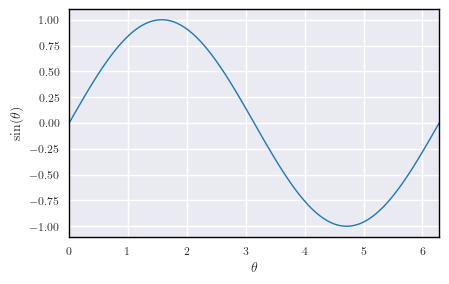

In [20]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

import numpy as np
import matplotlib.pyplot as plt

# Using seaborn's style
plt.style.use('seaborn')
width = 345
# width = 1000

palette = sns.color_palette("tab20", 12)
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', palette)))
palette

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams.update(tex_fonts)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4

x = np.linspace(0, 2*np.pi, 100)
# Initialise figure instance
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
# Plot
ax.plot(x, np.sin(x))
ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sin (\theta)$')



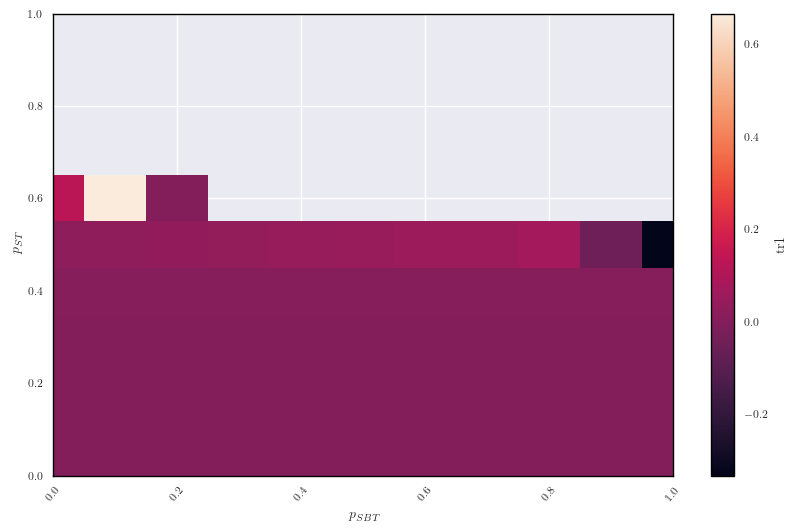

In [100]:
fig, ax = plt.subplots(figsize=(10, 6))

colormesh = ax.pcolormesh(pv.columns, pv.index, pv, cmap=sns.color_palette("rocket", as_cmap=True))

ax.tick_params(axis='x', which='major', rotation=50)
# ax.set_xticks(pv.columns)
# ax.set_yticks(pv.index)

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

cbar = fig.colorbar(colormesh,ax = ax)

# ax.plot(pbs, rho_crits, color='black')

ax.set_xlabel(r'$p_{SBT}$')
ax.set_ylabel(r'$p_{ST}$')
# ax.set_xlabel('p_SB')

cbar.set_label("tr1")

Text(0.5, 0.98, ' tr1 ')

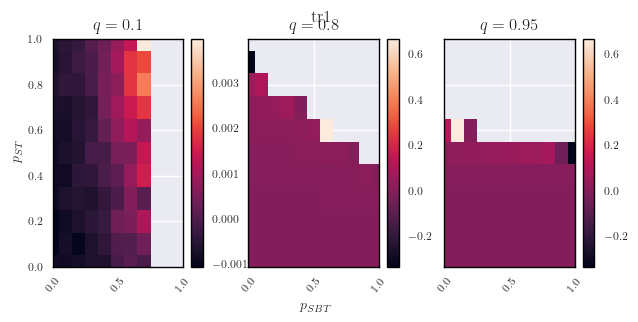

In [101]:

save_ = False

figsize = set_size(width)
figsize = (figsize[0]*1.5, figsize[1])

fig, axs = plt.subplots(1, 3, figsize=figsize, sharey=True, sharex = True)

# cbar_ax = fig.add_axes([.91, .3, .03, .4])

qs = np.unique(get_index_row(df2_correct_g_trans_mins[dataset_ind], 0))

minval = df2_correct_g_trans_mins[dataset_ind].describe().tr1["min"]
maxval = df2_correct_g_trans_mins[dataset_ind].describe().tr1["max"]

for i, (ax, q) in enumerate(zip(axs.flat, qs)):
    # if i == 11:
    #     continue
    inds2 = np.abs(get_index_row(df2_correct_g_trans_mins[dataset_ind], 0) - q) < 1e-5
    
    df_temp = df2_correct_g_trans_mins[dataset_ind][inds2].copy(deep=True)
    
    
    pv = pd.pivot_table(df_temp, values = "tr1", index = "ps", columns = "p")
    # print(pv)
    colormesh = ax.pcolormesh(pv.columns, pv.index, pv, cmap=sns.color_palette("rocket", as_cmap=True))

    ax.tick_params(axis='x', which='major', rotation=50)
    # ax.set_xticks(pv.columns)
    # ax.set_yticks(pv.index)
    
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    cbar = fig.colorbar(colormesh,ax = ax)

    # ax.set_xlabel(r'$p_{SBT}$')
    # ax.set_ylabel(r'$p_{ST}$')
    # # ax.set_xlabel('p_SB')

    # cbar.set_label("closest_to_rho")

    ax.set_title(r'$q={q}$'.format(q=round(q, 2)))
    
    
    if i%3 == 0:
        # print(yticklabels)
        # ax.set_yticklabels(yticklabels)
        # print(ax.get_yticklabels())
        ax.set_ylabel(r'$p_{ST}$')
    else:
        # print(ax.get_yticklabels())
        ax.set_ylabel('')
        ax.tick_params(left=False)
        # print(yticklabels)
    if i == 1:
        ax.set_xlabel(r'$p_{SBT}$')
    else:
        ax.set_xlabel('')
    if i < 3:
        ax.tick_params(bottom=False)
    # else:
        # ax.set_xticklabels(xticklabels)
    # else: break

# axs.fla

fig.suptitle(' tr1 ')

In [102]:
df2_correct_g_trans_mins[0].tr1.quantile(0.05), df2_correct_g_trans_mins[0].tr1.max()
df2_correct_g_trans_mins[0].tr1.describe()

count    236.000000
mean       0.007906
std        0.070202
min       -0.333333
25%       -0.000040
50%        0.000616
75%        0.002613
max        0.666667
Name: tr1, dtype: float64

(-0.0037878787878787845, 0.04900969161470059)
(-0.0026579604794784383, 0.04755231344212489)
(-0.09609768703546173, 0.0026388331201873116)
(-0.09348133822559855, 0.0024001485319099305)
(-0.0037878787878787845, 0.04752343478872062)
(-0.001774393899971033, 0.04605078201010717)
(-0.3333333333333333, 0.6666666666666667)
(-0.03395884058018475, 0.11437146966558337)
(-0.3333333333333333, 0.001414375190595285)
(-0.3333333333333333, 0.001312927247247037)
(-0.3333333333333333, 0.6666666666666667)
(-0.02100549861152437, 0.1988685877595236)


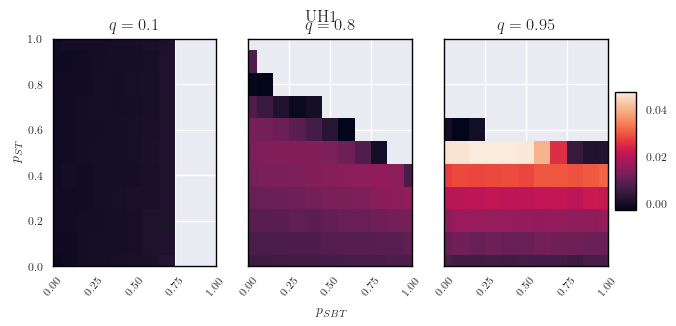

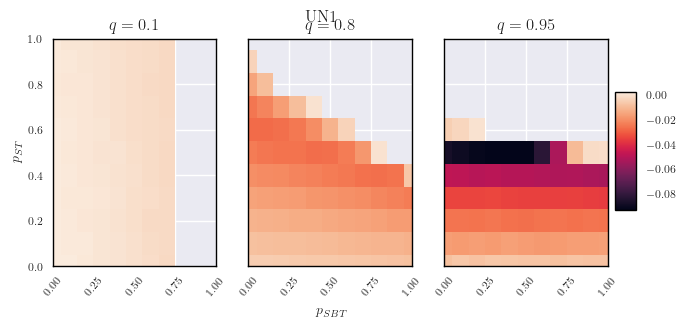

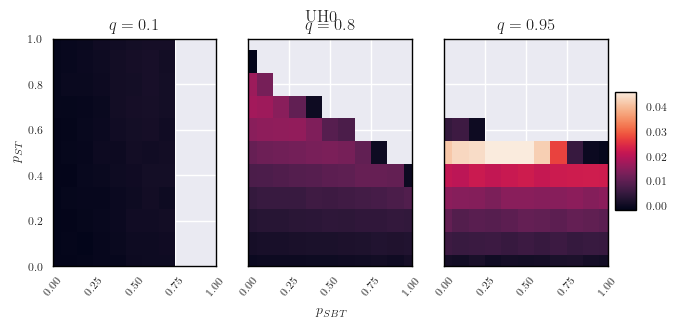

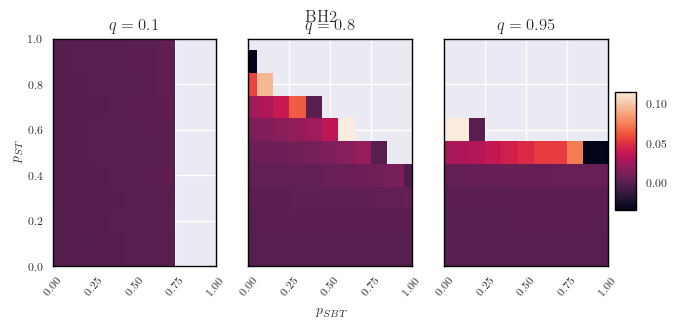

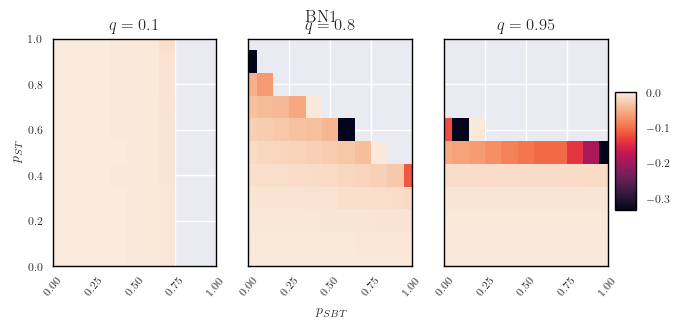

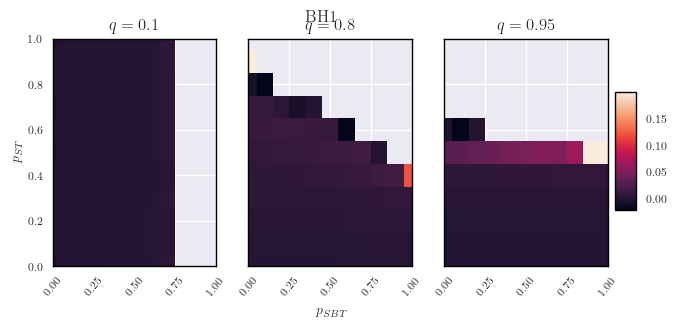

In [103]:
dataset_ind = 0

save_ = False
log = False

for triad in [*n1_triads, *n2_triads]:
    triad_proper_name = triad_names_map[triad]

    figsize = set_size(width)
    figsize = (figsize[0]*1.5, figsize[1])

    fig, axs = plt.subplots(1, 3, figsize=figsize, sharey=True, sharex = True)

    cbar_ax = fig.add_axes([.91, .3, .03, .4])

    qs = np.unique(get_index_row(df2_correct_g_trans_mins[dataset_ind], 0))

    minval = df2_correct_g_trans_mins[dataset_ind].describe()[triad]["min"] 
    maxval = df2_correct_g_trans_mins[dataset_ind].describe()[triad]["max"]
    
    print((minval, maxval))
    
    minval = df2_correct_g_trans_mins[dataset_ind][triad].quantile(0.01)
    maxval = df2_correct_g_trans_mins[dataset_ind][triad].quantile(0.99)
    
    print((minval, maxval))
    if log:
        minval = np.log10(minval)
        maxval = np.log10(maxval)
    
    for i, (ax, q) in enumerate(zip(axs.flat, qs)):
        # if i == 11:
        #     continue

        inds2 = np.abs(get_index_row(df2_correct_g_trans_mins[dataset_ind], 0) - q) < 1e-5
    
        df_temp = df2_correct_g_trans_mins[dataset_ind][inds2].copy(deep=True)
        
        
        pv = pd.pivot_table(df_temp, values = triad, index = "ps", columns = "p")
        if log == True:
            pv = np.log10(pv)
        colormesh = ax.pcolormesh(pv.columns, pv.index, pv, cmap=sns.color_palette("rocket", as_cmap=True),
                                  vmin = minval, vmax = maxval)

        ax.tick_params(axis='x', which='major', rotation=50)
        # ax.set_xticks(pv.columns)
        # ax.set_yticks(pv.index)
        
        ax.set_xlim([0,1])
        ax.set_ylim([0,1])

        if i == 0:
            cbar = fig.colorbar(colormesh,cax = cbar_ax)#, fraction=0.046, pad=0.04)#,vmin = minval, vmax = maxval)
        
        
        # sns.heatmap(pv, square = True, ax = ax, cbar_ax = cbar_ax, cbar = i == 0, vmin = minval, vmax = maxval)
        
        ax.set_title(r'$q={q}$'.format(q=round(q, 2)))
        
        # fmt = '{:0.1f}'
        # xticklabels = []
        # for item in ax.get_xticklabels():
        #     item.set_text(fmt.format(float(item.get_text())))
        #     xticklabels += [item]
            
        # if len(ax.get_yticklabels()) > 0:
        #     # print(q)
        #     yticklabels = []
            
        #     for item in ax.get_yticklabels():
        #         item.set_text(fmt.format(float(item.get_text())))
        #         yticklabels += [item]
        # else:
        #     yticklabels2 = []
        #     for item in yticklabels:
        #         item.set_text(fmt.format(float(item.get_text())))
        #         yticklabels2 += [item]
        #     ax.set_yticklabels(yticklabels2)
        
        if i%3 == 0:
            # print(yticklabels)
            # ax.set_yticklabels(yticklabels)
            # print(ax.get_yticklabels())
            ax.set_ylabel(r'$p_{ST}$')
        else:
            # print(ax.get_yticklabels())
            ax.set_ylabel('')
            ax.tick_params(left=False)
            # print(yticklabels)
        if i == 1:
            ax.set_xlabel(r'$p_{SBT}$')
        else:
            ax.set_xlabel('')
        if i < 3:
            ax.tick_params(bottom=False)
        # else:
            # ax.set_xticklabels(xticklabels)
    
    fig.suptitle(triad_proper_name)
    
    if save_:
        fname = "maps/map_long2_" + triad_proper_name
        # fname = fname + filename_addon
        if log:
            fname = fname + "_log"
        fname = fname + ".pdf"
        
        fig.savefig(fname, format='pdf', bbox_inches='tight') 

## Line Plot

In [212]:
arr=np.array(pv[0.6])
print(arr)

np.where(~np.isnan(arr))[0][-1]

arr2 = arr[np.where(~np.isnan(arr))[0]]
print(arr2)

np.nanmean(arr2[-5:-1])

[ 0.00116884  0.00132157  0.00157897  0.00226592  0.00412112  0.00448699
 -0.12716771         nan         nan         nan]
[ 0.00116884  0.00132157  0.00157897  0.00226592  0.00412112  0.00448699
 -0.12716771]


0.0031132524325918898

In [160]:
np.where(pv.abs() > pv.mean().abs()/10)
ydata = axs[0].lines[0].get_ydata()
ydata[-1] / np.mean(ydata)

6.001275537751362

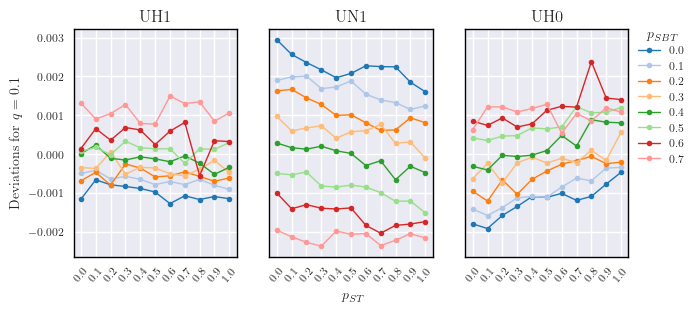

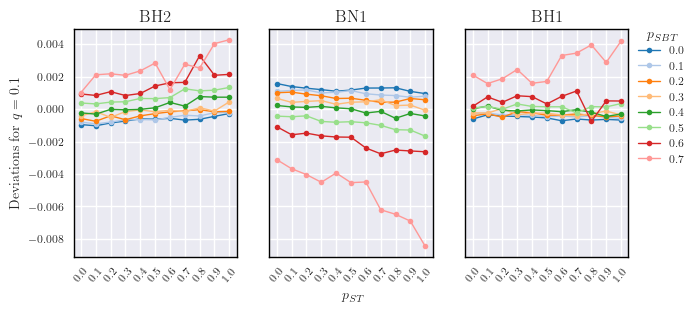

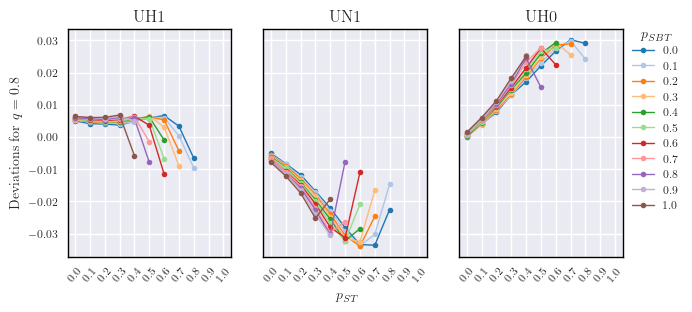

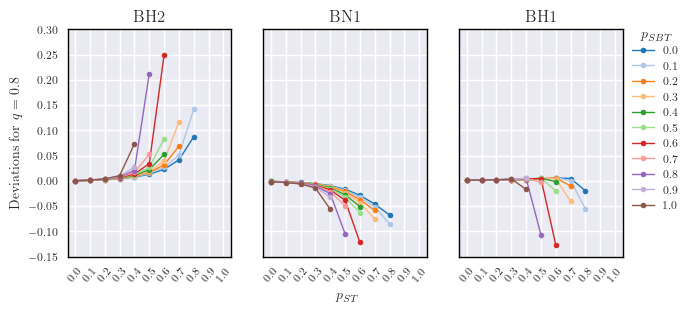

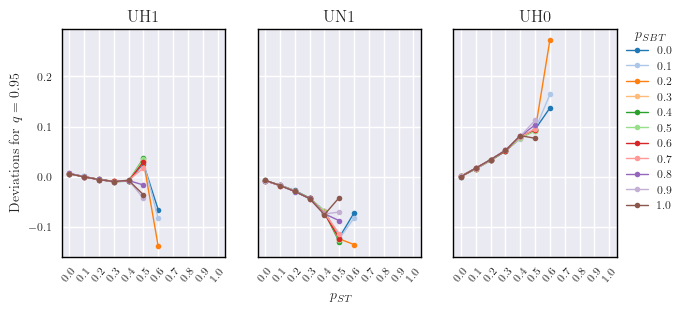

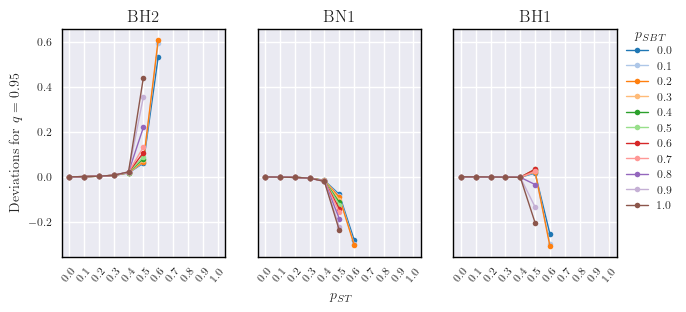

In [24]:
dataset_ind = 0

save_ = True
log = False

triad_groups = (n1_triads, n2_triads)

qs_inds = [0,1, 2]
# qs_inds = [1]

qs = np.unique(get_index_row(df2_correct_g_trans_mins[dataset_ind], 0))

inds_to_del_q_g_t = []

for q_ind in qs_inds:
    q = qs[q_ind]
    inds_to_del= []
    get_to_del = True
    
    for triad_i,triad_group in enumerate(triad_groups):
        
        figsize = set_size(width)
        figsize = (figsize[0]*1.5, figsize[1])

        fig, axs = plt.subplots(1, 3, figsize=figsize, sharey=True, sharex = True)
        
        for i, (ax, triad) in enumerate(zip(axs.flat, triad_group)):
            triad_proper_name = triad_names_map[triad]
            
            inds2 = np.abs(get_index_row(df2_correct_g_trans_mins[dataset_ind], 0) - q) < 1e-5
            df_temp = df2_correct_g_trans_mins[dataset_ind][inds2].copy(deep=True)
            
            pv = pd.pivot_table(df_temp, values = triad, index = "ps", columns = "p")
            
            
            if log == True:
                pv = np.log10(pv)
            
            pv.plot(xticks=pv.index, ylabel=(r'Deviations for $q={q}$'.format(q=round(q, 2))), ax = ax, linestyle = '-', marker= 'o')
            
            if get_to_del and (i == 1):
                get_to_del = False
                
                for line_i, line in enumerate(axs[1].lines):
                    ydata = np.array(line.get_ydata())
                    y_ind = np.where(~np.isnan(ydata))[0][-1]
                    
                    ydata2 = ydata[np.where(~np.isnan(ydata))[0]]
                    ymean = np.mean(ydata2[-5:-1]) 
                    # average from last 4 elements excluding the last one. 
                    
                    # print(ydata[y_ind], np.nanmean(ydata))
                    # print(np.abs(ydata[y_ind] / np.nanmean(ydata)))
                    # # if np.isnan(ydata[-1]):
                    # print(ydata)
                    if np.abs(ydata[y_ind] / ymean) < 0.1:
                        inds_to_del.append((line_i, y_ind))
                        # 
                        ydata[y_ind] = np.NaN
                        line.set_ydata(ydata)
                        
                        ydata = np.array(axs[0].lines[line_i].get_ydata())
                        ydata[y_ind] = np.NaN
                        axs[0].lines[line_i].set_ydata(ydata)
            elif len(inds_to_del) > 0:
                for line_i, y_ind in inds_to_del:
                    ydata = np.array(axs[i].lines[line_i].get_ydata())
                    ydata[y_ind] = np.NaN
                    axs[i].lines[line_i].set_ydata(ydata)
                
                # pv = pv*(pv.abs() > pv.mean().abs()/10)
            
            ax.set_title(triad_proper_name)
            ax.tick_params(axis='x', which='major', rotation=50)
            
            ax.set_xlim([-0.05,1.05])
            # ax.set_ylim()
            xticks = np.arange(0, 1.1, 0.1)
            xtick_labels = [f'{tick:.1f}' for tick in xticks]
            ax.set_xticks(xticks)
            ax.set_xticklabels(xtick_labels)
            
            if i == 1:
                ax.set_xlabel(r'$p_{ST}$')
            else:
                ax.set_xlabel('')
                
            if i == 2:
                ax.legend(bbox_to_anchor=(1.4, 1.05), title = r'$p_{SBT}$')
            else:
                ax.legend().set_visible(False)
            
            if (triad_i == 1) and (q_ind == 1):
                ax.set_ylim([-0.15,0.3])
            
            
        
        
        inds_to_del_q_g_t.append(inds_to_del)
        
        if save_:
            fname = "figs/cmpl/disc_pst3_" + "g" + str(triad_i) + "_" + str(int(q*10))
            # fname = fname + filename_addon
            # if log:
            #     fname = fname + "_log"
            fname = fname + ".pdf"
            
            fig.savefig(fname, format='pdf', bbox_inches='tight') 
        


In [236]:
inds_to_del_q_g_t

[[],
 [],
 [(0, 9), (2, 8), (4, 7)],
 [(0, 9), (2, 8), (4, 7)],
 [(3, 6)],
 [(3, 6)]]

In [241]:
pv.drop(columns = [0.9])

ps,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
p,,,,,,,,,
0.0,0.000933,0.000915,0.001066,0.001220,0.002101,0.003511,0.005727,0.004631,-0.019743
0.1,0.000999,0.001035,0.001179,0.001422,0.002086,0.003914,0.005798,0.000708,-0.056140
0.2,0.001020,0.001095,0.001251,0.001606,0.002437,0.004256,0.005893,-0.010148,-0.333333
0.3,0.001031,0.001197,0.001317,0.001721,0.002767,0.004954,0.004162,-0.040681,NaN
0.4,0.001149,0.001190,0.001401,0.001805,0.003038,0.005354,-0.001637,0.161036,NaN
0.5,0.001137,0.001222,0.001406,0.001973,0.003347,0.005745,-0.020109,NaN,NaN
0.6,0.001169,0.001322,0.001579,0.002266,0.004121,0.004487,-0.127168,NaN,NaN
0.7,0.001183,0.001362,0.001700,0.002528,0.004531,-0.002762,NaN,NaN,NaN
0.8,0.001255,0.001480,0.001789,0.002881,0.004830,-0.107045,NaN,NaN,NaN


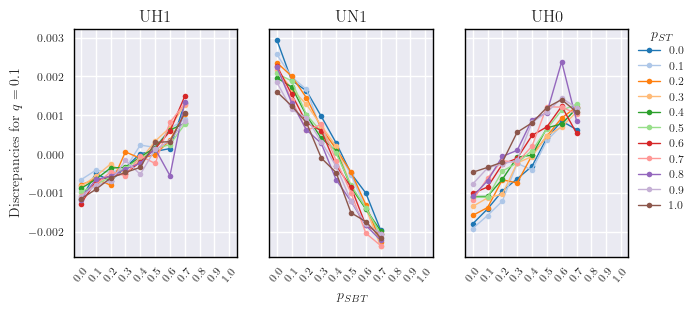

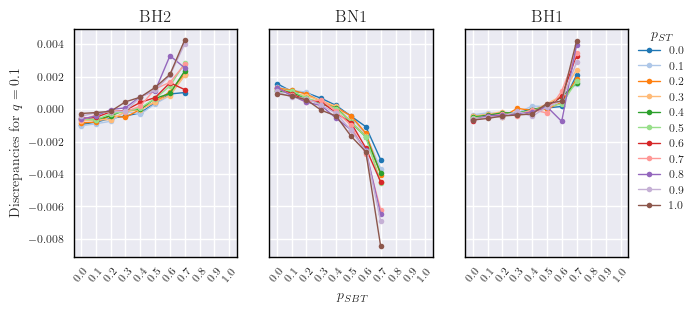

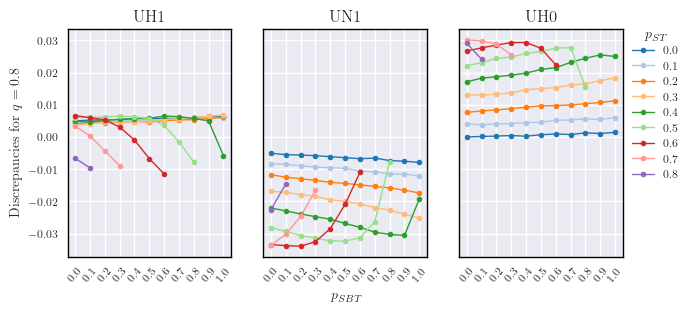

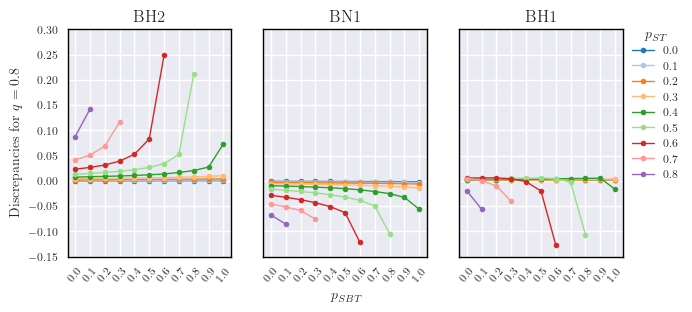

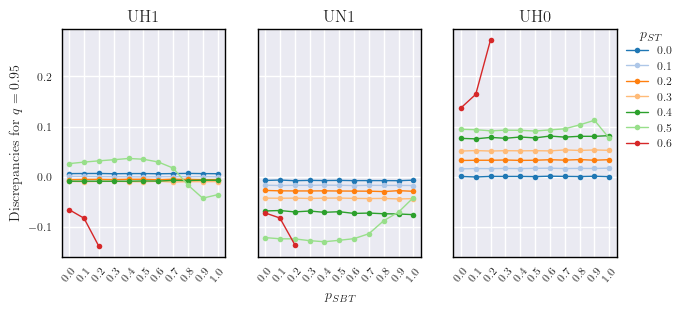

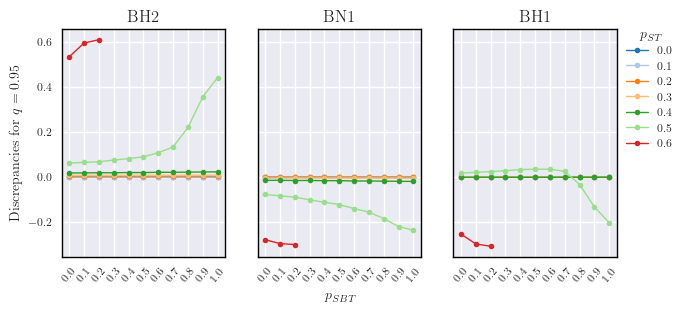

In [254]:

save_ = True
log = False

triad_groups = (n1_triads, n2_triads)

qs_inds = [0, 1,2]
# qs_inds = [1]

qs = np.unique(get_index_row(df2_correct_g_trans_mins[dataset_ind], 0))

inds_to_del_q_g_t_psbt = []

for q_ind in qs_inds:
    q = qs[q_ind]
    inds_to_del= []
    get_to_del = True
    
    # ti_min = np.NaN
    # ti_max = np.NaN
    for triad_i, triad_group in enumerate(triad_groups):
        figsize = set_size(width)
        figsize = (figsize[0]*1.5, figsize[1])

        fig, axs = plt.subplots(1, 3, figsize=figsize, sharey=True, sharex = True)
        
        for i, (ax, triad) in enumerate(zip(axs.flat, triad_group)):
            triad_proper_name = triad_names_map[triad]
            
            inds2 = np.abs(get_index_row(df2_correct_g_trans_mins[dataset_ind], 0) - q) < 1e-5
            df_temp = df2_correct_g_trans_mins[dataset_ind][inds2].copy(deep=True)
            
            pv = pd.pivot_table(df_temp, values = triad, index = "p", columns = "ps")
            if log == True:
                pv = np.log10(pv)
            
            if (q_ind == 1):
                pv = pv.drop(columns = [0.9])
            
            pv.plot(xticks=pv.index, ylabel=(r'Discrepancies for $q={q}$'.format(q=round(q, 2))), ax = ax, linestyle = '-', marker= 'o')
            
            if get_to_del and (i == 1):
                get_to_del = False
                
                for line_i, line in enumerate(axs[1].lines):
                    ydata = np.array(line.get_ydata())
                    y_ind = np.where(~np.isnan(ydata))[0][-1]
                    
                    ydata2 = ydata[np.where(~np.isnan(ydata))[0]]
                    ymean = np.mean(ydata2[-5:-1]) 
                    # average from last 4 elements excluding the last one. 
                    
                    if np.abs(ydata[y_ind] / ymean) < 0.1:
                        inds_to_del.append((line_i, y_ind))
                        # 
                        ydata[y_ind] = np.NaN
                        line.set_ydata(ydata)
                        
                        ydata = np.array(axs[0].lines[line_i].get_ydata())
                        ydata[y_ind] = np.NaN
                        axs[0].lines[line_i].set_ydata(ydata)
            elif len(inds_to_del) > 0:
                for line_i, y_ind in inds_to_del:
                    ydata = np.array(axs[i].lines[line_i].get_ydata())
                    ydata[y_ind] = np.NaN
                    axs[i].lines[line_i].set_ydata(ydata)
            
            ax.set_xlim([-0.05,1.05])
            xticks = np.arange(0, 1.1, 0.1)
            xtick_labels = [f'{tick:.1f}' for tick in xticks]
            ax.set_xticks(xticks)
            ax.set_xticklabels(xtick_labels)
            
            ax.set_title(triad_proper_name)
            ax.tick_params(axis='x', which='major', rotation=50)
            
            if i == 1:
                ax.set_xlabel(r'$p_{SBT}$')
            else:
                ax.set_xlabel('')
                
            if i == 2:
                ax.legend(bbox_to_anchor=(1.4, 1.05), title = r'$p_{ST}$')
            else:
                ax.legend().set_visible(False)
                
            if (triad_i == 1) and (q_ind == 1):
                ax.set_ylim([-0.15,0.3])
            
        #     if ~np.isnan(ti_min):
        #         ax.set_ylim([ti_min, ti_max])
            
        # ti_min, ti_max = ax.get_ylim()
        # ti_max = np.NaN
        
        inds_to_del_q_g_t_psbt.append(inds_to_del)
        
        if save_:
            fname = "figs/cmpl/disc_psbt2_" + "g" + str(triad_i) + "_" + str(int(q*10))
            # fname = fname + filename_addon
            # if log:
            #     fname = fname + "_log"
            fname = fname + ".pdf"
            
            fig.savefig(fname, format='pdf', bbox_inches='tight') 
        
        

## Unnormalized line plots

In [257]:
inds_to_del_q_g_t_psbt
inds_to_del_q_g_t

[[],
 [],
 [(0, 9), (2, 8), (4, 7)],
 [(0, 9), (2, 8), (4, 7)],
 [(3, 6)],
 [(3, 6)]]

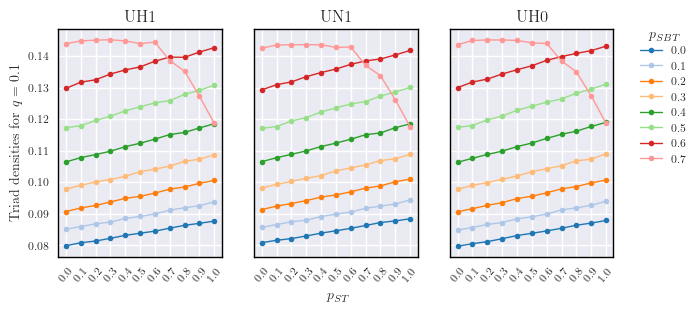

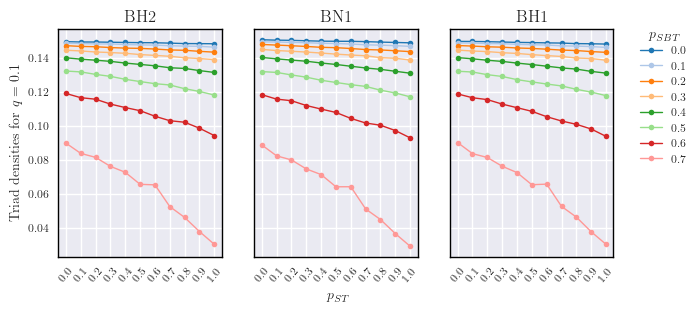

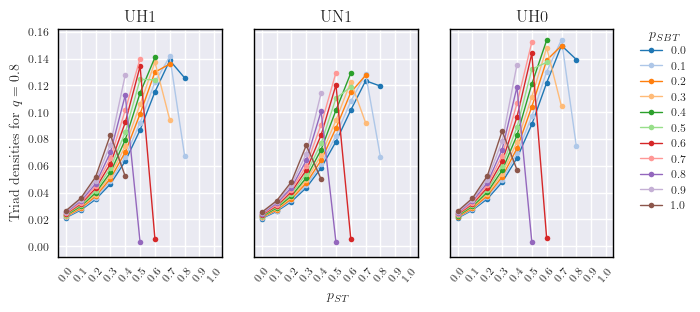

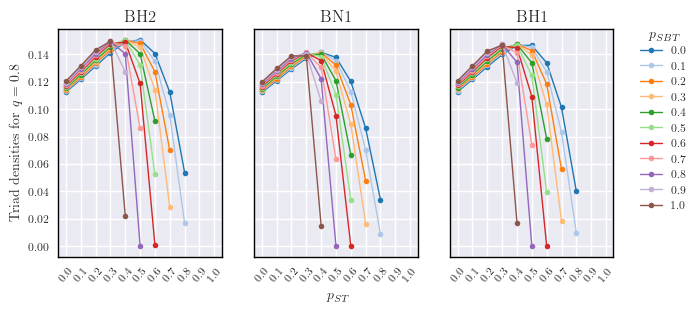

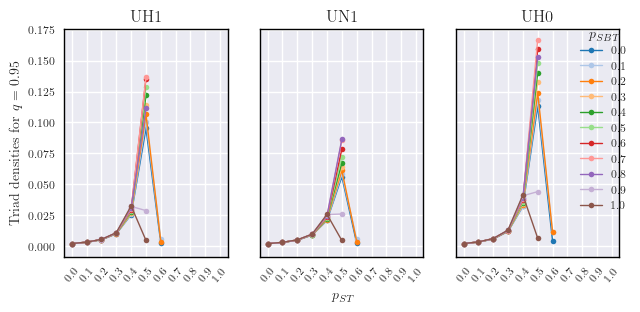

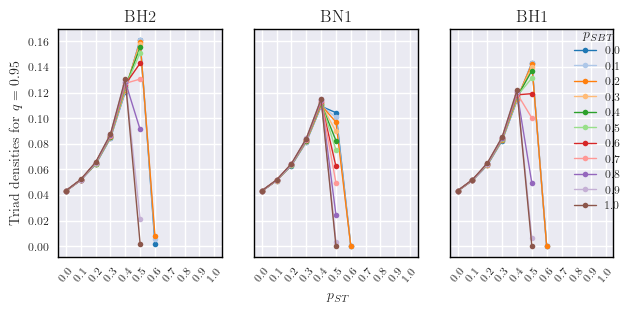

In [260]:


save_ = True

triad_groups = (n1_triads, n2_triads)

qs_inds = [0,1, 2]

qs = np.unique(get_index_row(df2_correct_g_mins[dataset_ind], 0))

fig_ind = 0
for q_ind in qs_inds:
    q = qs[q_ind]
    
    for triad_i, triad_group in enumerate(triad_groups):
        inds_to_del = inds_to_del_q_g_t[fig_ind]
        fig_ind += 1
        
        figsize = set_size(width)
        figsize = (figsize[0]*1.5, figsize[1])

        fig, axs = plt.subplots(1, 3, figsize=figsize, sharey=True, sharex = True)
        
        for i, (ax, triad) in enumerate(zip(axs.flat, triad_group)):
            triad_proper_name = triad_names_map[triad]
            
            inds2 = np.abs(get_index_row(df2_correct_g_mins[dataset_ind], 0) - q) < 1e-5
            df_temp = df2_correct_g_mins[dataset_ind][inds2].copy(deep=True)
            
            pv = pd.pivot_table(df_temp, values = triad, index = "ps", columns = "p")
            if log == True:
                pv = np.log10(pv)
            
            pv.plot(xticks=pv.index, ylabel=(r'Triad densities for $q={q}$'.format(q=round(q, 2))), ax = ax, linestyle = '-', marker= 'o')
            
            if len(inds_to_del) > 0:
                for line_i, y_ind in inds_to_del:
                    ydata = np.array(axs[i].lines[line_i].get_ydata())
                    ydata[y_ind] = np.NaN
                    ax.lines[line_i].set_ydata(ydata)
            
            ax.set_title(triad_proper_name)
            ax.tick_params(axis='x', which='major', rotation=50)
            
            ax.set_xlim([-0.05,1.05])
            # ax.set_ylim()
            xticks = np.arange(0, 1.1, 0.1)
            xtick_labels = [f'{tick:.1f}' for tick in xticks]
            ax.set_xticks(xticks)
            ax.set_xticklabels(xtick_labels)
            
            if i == 1:
                ax.set_xlabel(r'$p_{ST}$')
            else:
                ax.set_xlabel('')
                
            if i == 2:
                ax.legend(bbox_to_anchor=(1.1, 1.05), title = r'$p_{SBT}$')
            else:
                ax.legend().set_visible(False)
            
        if save_:
            fname = "figs/cmpl/abund_pst2_" + "g" + str(triad_i) + "_" + str(int(q*10))
            # fname = fname + filename_addon
            # if log:
            #     fname = fname + "_log"
            fname = fname + ".pdf"
            
            fig.savefig(fname, format='pdf', bbox_inches='tight') 
        


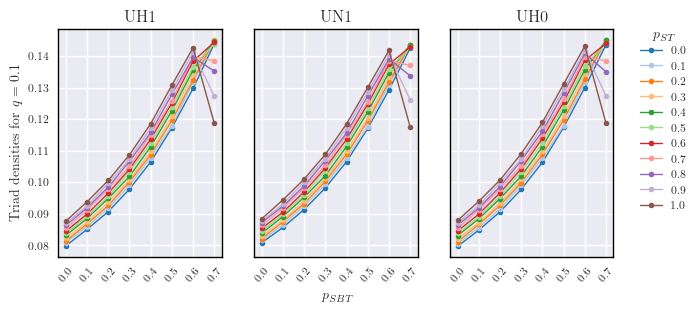

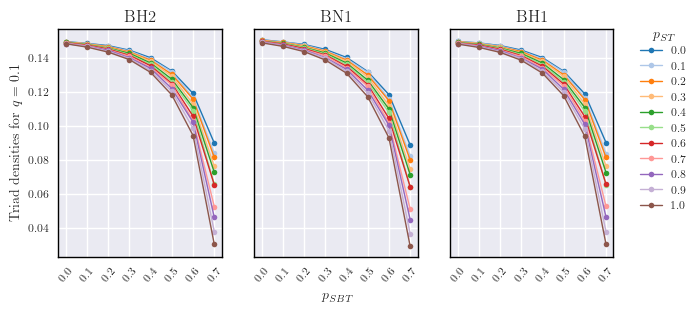

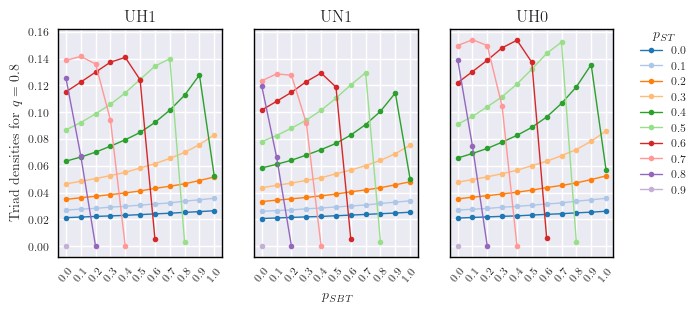

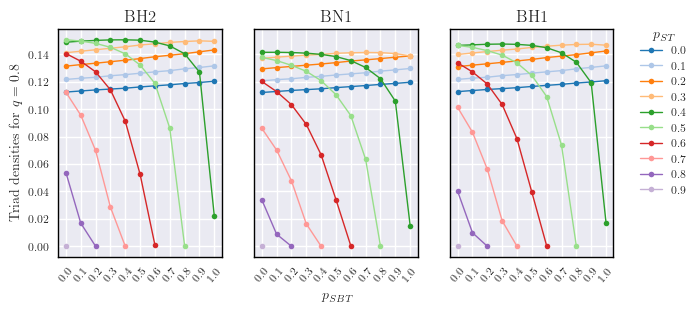

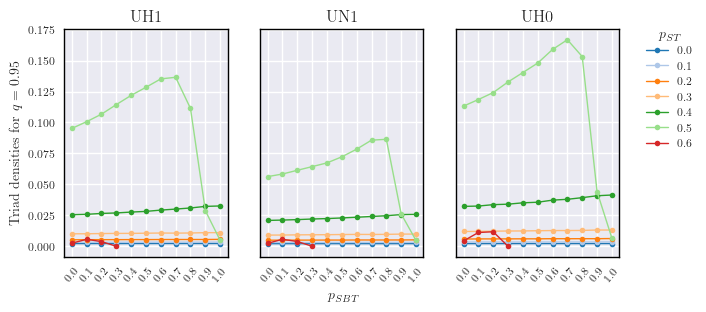

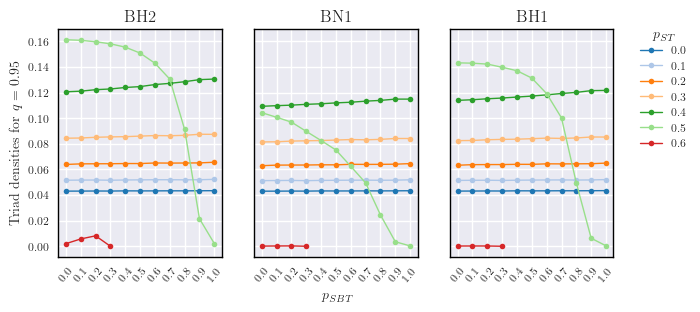

In [123]:
save_ = True
# log = False

triad_groups = (n1_triads, n2_triads)
# palette = sns.color_palette("tab20", 12)

qs_inds = [0,1, 2]

qs = np.unique(get_index_row(df2_correct_g_mins[dataset_ind], 0))

for q_ind in qs_inds:
    q = qs[q_ind]
    
    ti_min = np.NaN
    ti_max = np.NaN
    for ti, triad_group in enumerate(triad_groups):
        figsize = set_size(width)
        figsize = (figsize[0]*1.5, figsize[1])

        fig, axs = plt.subplots(1, 3, figsize=figsize, sharey=True, sharex = True)
        
        for i, (ax, triad) in enumerate(zip(axs.flat, triad_group)):
            triad_proper_name = triad_names_map[triad]
            
            inds2 = np.abs(get_index_row(df2_correct_g_mins[dataset_ind], 0) - q) < 1e-5
            df_temp = df2_correct_g_mins[dataset_ind][inds2].copy(deep=True)
            
            pv = pd.pivot_table(df_temp, values = triad, index = "p", columns = "ps")
            if log == True:
                pv = np.log10(pv)
            
            pv.plot(xticks=pv.index, ylabel=(r'Triad densities for $q={q}$'.format(q=round(q, 2))), ax = ax, linestyle = '-', marker= 'o')
            
            ax.set_title(triad_proper_name)
            ax.tick_params(axis='x', which='major', rotation=50)
            
            if i == 1:
                ax.set_xlabel(r'$p_{SBT}$')
            else:
                ax.set_xlabel('')
                
            if i == 2:
                ax.legend(bbox_to_anchor=(1.1, 1.05), title = r'$p_{ST}$')
            else:
                ax.legend().set_visible(False)
            
        #     if ~np.isnan(ti_min):
        #         ax.set_ylim([ti_min, ti_max])
            
        # ti_min, ti_max = ax.get_ylim()
        
        if save_:
            fname = "figs/cmpl/abund_psbt_" + "g" + str(ti) + "_" + str(int(q*10))
            # fname = fname + filename_addon
            # if log:
            #     fname = fname + "_log"
            fname = fname + ".pdf"
            
            fig.savefig(fname, format='pdf', bbox_inches='tight') 
        

In [23]:
df2_rho_correct_g.rho
df2_rho_correct_g.tr3

df2_rho_correct_g.tr4

0.10  0.0  0.0  0.5    0.149729
           0.1  0.5    0.149695
           0.2  0.5    0.149581
           0.3  0.5    0.149376
           0.4  0.5    0.149161
                         ...   
0.95  1.0  0.6  0.5         NaN
           0.7  0.5         NaN
           0.8  0.5         NaN
           0.9  0.5         NaN
           1.0  0.5         NaN
Name: tr4, Length: 363, dtype: float64

In [106]:
plt.plot(df2_rho_correct_g.rho, df2_rho_correct_g.tr3, 'o')

NameError: name 'df2_rho_correct_g' is not defined

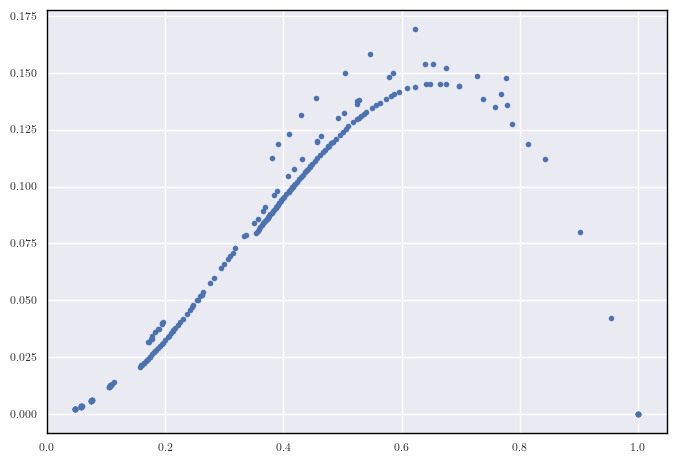

In [28]:
plt.plot(df2_rho_correct_g.rho, df2_rho_correct_g.tr6, 'o')

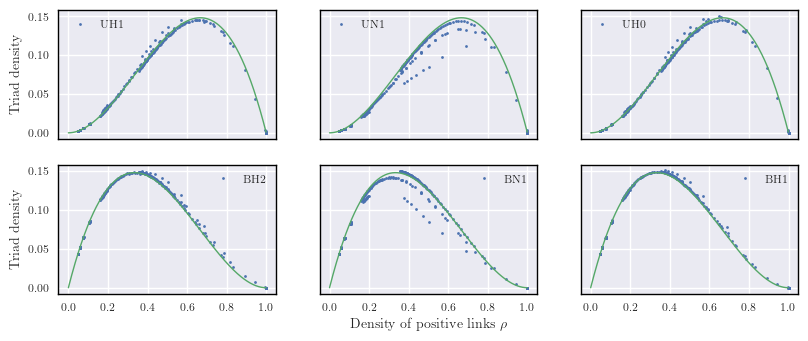

In [107]:

save_ = False

triad_groups = (n1_triads, n2_triads)

figsize = set_size(width)
figsize = (figsize[0]*2, figsize[1]*1.25)

fig, axs = plt.subplots(2, 3, figsize=figsize, sharey=True, sharex = True)

markers = ['o', 's', 'D']

rho = df2_ag_correct_g.rho
rho_theor = np.arange(0.,1.,0.001)
    
for i, triad_group in enumerate(triad_groups):
    # neg_link_count = 
    if triad_group == n1_triads:
        d_theor = rho_theor**2 * (1-rho_theor)
    else:
        d_theor = rho_theor * (1-rho_theor)**2
    
    
    for j, triad in enumerate(triad_group):
        triad_proper_name = triad_names_map[triad]
        
        
        axs[i, j].plot(rho, df2_ag_correct_g[triad], label=r'{n}'.format(n=triad_proper_name), marker = '.', linestyle = '')
        
        axs[i,j].plot(rho_theor, d_theor,label='')
        
        # axs[i,j].set_title(triad_proper_name)
        
        if j%3 == 0:
            # print(yticklabels)
            # ax.set_yticklabels(yticklabels)
            # print(ax.get_yticklabels())
            axs[i,j].set_ylabel(r'Triad density')
        else:
            # print(ax.get_yticklabels())
            axs[i,j].set_ylabel('')
            # axs[i,j].tick_params(left=False)
            # axs[i,j].set_yticks([])
            # print(yticklabels)
        if i == 1 & j == 1:
            axs[i,j].set_xlabel(r'Density of positive links $\rho$')
        # elif i == 0:
            # axs[i,j].set_xticks([])
            # axs[i,j].tick_params(bottom=False)
        
        axs[i,j].legend()
        # else:
            # ax.set_xticklabels(xticklabels)
            
        # if i == 2:
        #     ax.legend(bbox_to_anchor=(1.1, 1.05), title = r'$p_{SBT}$')
        # else:
        #     ax.legend().set_visible(False)
    


if save_:
    fname = "figs/cmpl/triad_density_rho" 
    # fname = fname + filename_addon
    fname = fname + ".pdf"

    fig.savefig(fname, format='pdf', bbox_inches='tight') 

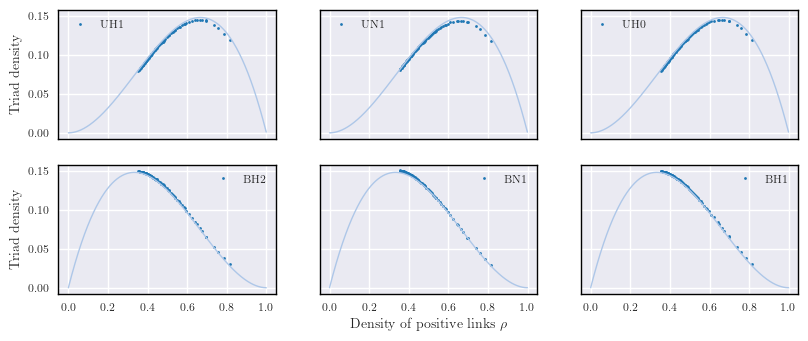

In [265]:

save_ = False
q = 0.1

df_temp = df2_correct_gs[dataset_ind][df2_correct_gs[dataset_ind].q == q]

triad_groups = (n1_triads, n2_triads)

figsize = set_size(width)
figsize = (figsize[0]*2, figsize[1]*1.25)

fig, axs = plt.subplots(2, 3, figsize=figsize, sharey=True, sharex = True)

markers = ['o', 's', 'D']

rho = df_temp.rho
rho_theor = np.arange(0.,1.,0.001)
    
for i, triad_group in enumerate(triad_groups):
    # neg_link_count = 
    if triad_group == n1_triads:
        d_theor = rho_theor**2 * (1-rho_theor)
    else:
        d_theor = rho_theor * (1-rho_theor)**2
    
    
    for j, triad in enumerate(triad_group):
        triad_proper_name = triad_names_map[triad]
        
        
        
        
        axs[i, j].plot(rho, df_temp[triad], label=r'{n}'.format(n=triad_proper_name), marker = '.', linestyle = '')
        
        axs[i,j].plot(rho_theor, d_theor,label='')
        
        # axs[i,j].set_title(triad_proper_name)
        
        if j%3 == 0:
            # print(yticklabels)
            # ax.set_yticklabels(yticklabels)
            # print(ax.get_yticklabels())
            axs[i,j].set_ylabel(r'Triad density')
        else:
            # print(ax.get_yticklabels())
            axs[i,j].set_ylabel('')
            # axs[i,j].tick_params(left=False)
            # axs[i,j].set_yticks([])
            # print(yticklabels)
        if i == 1 & j == 1:
            axs[i,j].set_xlabel(r'Density of positive links $\rho$')
        # elif i == 0:
            # axs[i,j].set_xticks([])
            # axs[i,j].tick_params(bottom=False)
        
        axs[i,j].legend()
        # else:
            # ax.set_xticklabels(xticklabels)
            
        # if i == 2:
        #     ax.legend(bbox_to_anchor=(1.1, 1.05), title = r'$p_{SBT}$')
        # else:
        #     ax.legend().set_visible(False)
    


if save_:
    fname = "figs/cmpl/triad_density_rho" 
    fname = fname + str(q)
    fname = fname + ".pdf"

    fig.savefig(fname, format='pdf', bbox_inches='tight') 

In [271]:
sns.color_palette("Set1")

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

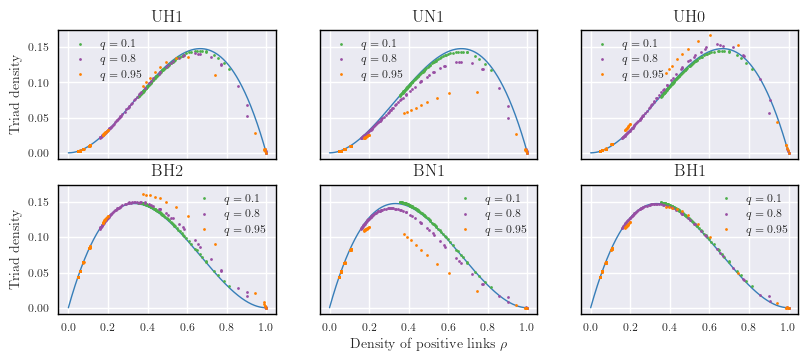

In [275]:

save_ = True

palette = sns.color_palette("Set1")

triad_groups = (n1_triads, n2_triads)

figsize = set_size(width)
figsize = (figsize[0]*2, figsize[1]*1.25)

fig, axs = plt.subplots(2, 3, figsize=figsize, sharey=True, sharex = True)

markers = ['o', 's', 'D']

rho_theor = np.arange(0.,1.,0.001)
    
for i, triad_group in enumerate(triad_groups):
    # neg_link_count = 
    if triad_group == n1_triads:
        d_theor = rho_theor**2 * (1-rho_theor)
    else:
        d_theor = rho_theor * (1-rho_theor)**2
    
    
    for j, triad in enumerate(triad_group):
        triad_proper_name = triad_names_map[triad]
        
        
        axs[i,j].plot(rho_theor, d_theor,label='', color = palette[1])
        
        for q_i, q in enumerate(qs):
            df_temp = df2_correct_gs[dataset_ind][df2_correct_gs[dataset_ind].q == q]
            rho = df_temp.rho
            
            axs[i, j].plot(rho, df_temp[triad], label=r'$q={n}$'.format(n=q), marker = '.', linestyle = '', color = palette[2+q_i])
        
            axs[i, j].set_title(r'{n}'.format(n=triad_proper_name))
        
        # axs[i,j].set_title(triad_proper_name)
        
        if j%3 == 0:
            # print(yticklabels)
            # ax.set_yticklabels(yticklabels)
            # print(ax.get_yticklabels())
            axs[i,j].set_ylabel(r'Triad density')
        else:
            # print(ax.get_yticklabels())
            axs[i,j].set_ylabel('')
            # axs[i,j].tick_params(left=False)
            # axs[i,j].set_yticks([])
            # print(yticklabels)
        if i == 1 & j == 1:
            axs[i,j].set_xlabel(r'Density of positive links $\rho$')
        # elif i == 0:
            # axs[i,j].set_xticks([])
            # axs[i,j].tick_params(bottom=False)
        
        axs[i,j].legend()
        # else:
            # ax.set_xticklabels(xticklabels)
            
        # if i == 2:
        #     ax.legend(bbox_to_anchor=(1.1, 1.05), title = r'$p_{SBT}$')
        # else:
        #     ax.legend().set_visible(False)
    


if save_:
    fname = "figs/cmpl/triad_density_rho_all" 
    # fname = fname + str(q)
    fname = fname + ".pdf"

    fig.savefig(fname, format='pdf', bbox_inches='tight') 

## Barplots

In [146]:

def plot_bar_nets(ax, ydata, yerr, triads_set, title, labels, 
                  line_level = 1/3, linewidth = 2, colors=None, 
                  width = 0.15, smallest_edge = False, m = 1,
                  legend_elem = 3, real_net_data = None, additional_label_data = None, real_net_additional_label_data = None):
    n_simulated = ydata.copy()
    if yerr is not None:
        n_err = yerr.copy()
    else:
        n_err = None   
    if real_net_data is not None:
        data_name = real_net_data.columns[0]
        real_data = [val[0] for val in real_net_data.values]
        n_simulated[data_name] = real_data
        if yerr is not None:
            real_data_std = np.full(len(n_simulated.index), np.nan)
            n_err[data_name] = real_data_std
#     width = 0.15
    multiplier = 0
    x = np.arange(len(n_simulated.index))*3-1.5
    for i, col in enumerate(n_simulated.columns):
        offset = multiplier*width*4
        if labels is not None:
            label = labels[i]
        else:
            # label = col
            # print(col)
            if len(col) == 3:
                q, p, ps = col
            elif len(col) == 4:
                _, q, p, ps = col
            elif len(col) == 5:
                _, q, p, ps, step = col
            # elif len(col) == 1:
            #     if real_net_data is not None:
            #     else:
            #         raise ValueError("column contains array with only one value")
            else:
                q, p, ps = col[:3]
            if (i + 1 == len(n_simulated.columns)) and (real_net_data is not None):
                label = col[0]
                if real_net_additional_label_data is not None:
                    # print(real_net_additional_label_data)
                    label += r": $\rho={rho}$".format(rho = round(real_net_additional_label_data, 2))
            elif legend_elem == 3:
                label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=round(q,2),p=round(p,2),ps=round(ps,2))
                if additional_label_data is not None:
                    label += r"$,\rho={rho}$".format(rho = round(additional_label_data[i], 2))
            elif legend_elem == 4:
                rho_init = col[3]
                label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps},\rho_{{0}}={rho_init}$".format(q=round(q,2),p=round(p,2),ps=round(ps,2), rho_init=round(rho_init,2))
                if additional_label_data is not None:
                    label += r"$,\rho={rho}$".format(rho = round(additional_label_data[i], 2))
            # print(lab)
        if n_err is not None:
            # print(n_err)
            # print(n_err[i])
            err = n_err[col[:4]]
            if np.any(np.isnan(err)):
                err = None
        else:
            err = None
        
        # print("H")
        if smallest_edge:
            edgecolor = [colors[i] if val else 'none' for ind, val in enumerate(n_simulated[col] < 0.01)]
        else:
            edgecolor = ['none' for ind, val in enumerate(n_simulated[col])]
        # print(n_simulated[col].values)
        # print(colors[i])
        rects = ax.bar(x=x+offset, height=n_simulated[col].values,
                       width=width, label=label, color=colors[i],
                       yerr=err,
                       edgecolor=edgecolor, linewidth=2)
        # ax.bar_label(rects, padding=3)
        # print("D")
        multiplier += m

    # print("F")
    ax.set_ylabel('Relative density')
    ax.set_title(title)
    if linewidth is not None:
        ax.hlines(y=line_level, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='black', linewidth=linewidth, ls='--')
    # ax.legend(loc='best')
    ax.set_xticks(x + width*m+1., triads_set)

def prepare_data4(df_g, triads_set, std_data = None, addon = "_lvl"):
    col_names = triads_set
    if not triads_set[0].endswith(addon):
        if triads_set[0] + addon in df_g.columns:
            col_names = [triad + addon for triad in triads_set]
    # if not triads_set[0].endswith("_lvl"):
    #     col_names = [triad + "_lvl" for triad in triads_set]
    # else:
    #     col_names = triads_set
    ydata = df_g[col_names].copy()
    n_sum = ydata.sum(axis=1)
    for col in ydata.columns:
        ydata[col] = ydata[col] / n_sum.values
    index = [ydata.index]
    if "q" in df_g:
        index.extend([df_g.q, df_g.p, df_g.ps])
    if "step" in df_g:
        index.append(df_g.step)
    ydata = ydata.set_index(index)
    ydata = ydata.transpose()
    if std_data is not None:
        if not isinstance(std_data, pd.DataFrame):
            yerr = std_data.loc[triads_set].copy().div(n_sum)
        else:
            col_names = [triad + addon + "_std" for triad in triads_set]
            yerr = std_data[col_names].copy()
            for col in yerr.columns:
                yerr[col] = yerr[col] / n_sum.values  
            yerr = yerr.transpose()
    else:
        yerr = None
    return ydata, yerr

def prepare_data5(df_g, triads_set, std_data = None, addon = "_lvl"):
    col_names = triads_set
    if not triads_set[0].endswith(addon):
        if triads_set[0] + addon in df_g.columns:
            col_names = [triad + addon for triad in triads_set]
    
    ydata = df_g[col_names].copy()
    n_sum = ydata.sum(axis=1)
    for col in ydata.columns:
        ydata[col] = ydata[col] / n_sum.values - 1/3
    index = [ydata.index]
    if "q" in df_g:
        index.extend([df_g.q, df_g.p, df_g.ps])
    if "step" in df_g:
        index.append(df_g.step)
    ydata = ydata.set_index(index)
    ydata = ydata.transpose()
    if std_data is not None:
        if not isinstance(std_data, pd.DataFrame):
            yerr = std_data.loc[triads_set].copy().div(n_sum)
        else:
            col_names = [triad + addon + "_std" for triad in triads_set]
            # print(col_names)
            yerr = std_data[col_names].copy()
            # print(n_sum.values  )
            for col in yerr.columns:
                yerr[col] = yerr[col] / n_sum.values  
            yerr = yerr.transpose()
    else:
        yerr = None
    return ydata, yerr

def prepare_data3(data, triads_sets_average, triads_set_final, std_data = None, norm_fun = prepare_data4):
    n_datas = [norm_fun(data, triads_set, std_data)[0] for triads_set in triads_sets_average]
    n_data = n_datas[0].append(n_datas[1])
    
    ydata = n_data.loc[triads_set_final]
    ydata = ydata.transpose()
    
    if std_data is not None:
        n_stds = [norm_fun(data, triads_set, std_data)[1] for triads_set in triads_sets_average]
        yerr = n_stds[0].append(n_stds[1])
        
        yerr = yerr.loc[triads_set_final]
        yerr = yerr.transpose()
    else:
        yerr = None
    return ydata, yerr

In [147]:

df2_erho_correct_g.iloc[inds_g3[-1]]

q                                         0.900000
p                                         0.000000
ps                                        0.800000
rho_init                                  0.800000
repetitions                               1.000000
                                            ...   
closest_to_six_triads_rho_transformed     0.095961
closest_to_four_triads_rho                0.000851
closest_to_four_triads_rho_transformed    0.051770
closest_to_six_triads_relative            3.365093
closest_to_four_triads_relative           2.205591
Name: (0.9, 0.0, 0.8, 0.8), Length: 72, dtype: float64

In [148]:
prepare_data5(df2_erho_correct_g.iloc[[inds_g3[-1]]], n1_triads, addon = "_lvl3")

(               0.9
                0.0
                0.8
                0.8
 q              0.9
 p              0.0
 ps             0.8
 tr3_lvl3  0.062740
 tr5_lvl3 -0.073217
 tr6_lvl3  0.010477,
 None)

In [149]:
ydata, yerr = prepare_data5(df2_erho_correct_g.iloc[inds_g3], n1_triads)
ydata

0.2       0.6       0.4       0.8       0.7                 0.9  \
              0.9       0.8       0.7       0.1       0.7       0.2       0.9   
              0.2       0.6       0.9       0.9       0.6       1.0       0.7   
              0.0       0.0       0.0       0.2       0.0       0.9       0.4   
q             0.2       0.6       0.4       0.8       0.7       0.7       0.9   
p             0.9       0.8       0.7       0.1       0.7       0.2       0.9   
ps            0.2       0.6       0.9       0.9       0.6       1.0       0.7   
tr3_lvl -0.046173 -0.017195 -0.020635  0.032668  0.016409  0.026429 -0.047761   
tr5_lvl  0.016981 -0.007991  0.003643 -0.031930 -0.016019 -0.023303 -0.042080   
tr6_lvl  0.029192  0.025186  0.016991 -0.000738 -0.000390 -0.003126  0.089840   

                                       ...       0.8       0.9            \
              0.2       0.7       0.0  ...       0.2       0.0             
              0.8       0.7       0.8  ...       0.9       1.0             
              0.6       0.4       0.4  ...       0.2       0.6       0.4   
q             0.9       0.9       0.9  ...       0.8       0.9       0.9   
p             0.2       0.7       0.0  ...       0.2       0.0       0.0   
ps            0.8       0.7       0.8  ...       0.9       1.0       1.0   
tr3_lvl  0.041112 -0.003514  0.059061  ...  0.037120  0.047512  0.041342   
tr5_lvl -0.053264 -0.049856 -0.061869  ... -0.040086 -0.084822 -0.087896   
tr6_lvl  0.012152  0.053371  0.002808  ...  0.002966  0.037310  0.046554   

                                  0.0                 0.1       0.9            
                        0.1       0.8                 0.9       0.0            
                        0.8       0.5                 0.8       0.8            
              0.2       0.4       0.2       0.0       0.0       0.9       0.8  
q             0.9       0.9       0.0       0.0       0.1       0.9       0.9  
p             0.0       0.1       0.8       0.8       0.9       0.0       0.0  
ps            1.0       0.8       0.5       0.5       0.8       0.8       0.8  
tr3_lvl  0.026541  0.061265 -0.039533 -0.037320 -0.080623  0.061265  0.061886  
tr5_lvl -0.077218 -0.067051  0.015449  0.015273  0.024574 -0.074127 -0.071480  
tr6_lvl  0.050677  0.005786  0.024083  0.022047  0.056049  0.012862  0.009594  

[3 rows x 45 columns]

In [150]:
ydata, yerr = prepare_data5(epinions, n1_triads)
ydata

,epinions
tr3,-0.022066
tr5,-0.138263
tr6,0.160329


/tmp/ipykernel_143073/1355872723.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, '$\\sin (\\theta)$')

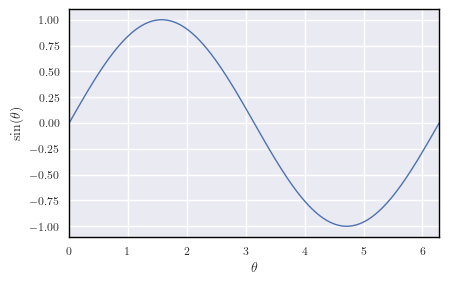

In [151]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

import numpy as np
import matplotlib.pyplot as plt

# Using seaborn's style
plt.style.use('seaborn')
width = 345
# width = 1000

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams.update(tex_fonts)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4

x = np.linspace(0, 2*np.pi, 100)
# Initialise figure instance
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
# Plot
ax.plot(x, np.sin(x))
ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sin (\theta)$')



[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


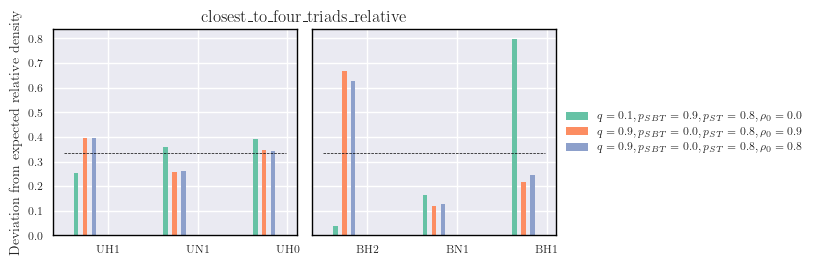

In [186]:
"""Many points
"""


save_ = False
fun_prepare_data = prepare_data4
linewidth = 0.5
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
addon = "_lvl"
which_group = 7 #there can be `group_size` bars (8 at max). If data has more, which to show
group_size = 6

# reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

# triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.8 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
ydata, yerr = fun_prepare_data(df2_erho_correct_g.iloc[inds_g3],  triads_set, 
                               std_data = None, addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy() 
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_1$'
plot_bar_nets(axes[0], ydata, None, triads_set, None, labels = None, 
              line_level = line_level, linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
ydata, yerr = fun_prepare_data(df2_erho_correct_g.iloc[inds_g3],  triads_set, 
                               std_data = None, addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_2$'

plot_bar_nets(axes[1], ydata, None, triads_set, None, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4)


# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    if i==1:
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

try:
    plt.title(error_functions[0 + which_group*2].__name__ + " and " + error_functions[1 + which_group*2].__name__)
except IndexError:
    plt.title(error_functions[0 + which_group*2].__name__)

fname = 'barplots_sim'
fname = fname + "_down"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_group)

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 

In [156]:
inds_g3[group_size*which_group:group_size*(which_group+1)]

[1564, 1640, 1549, 1564, 1662, 1640]

In [130]:
ydata, yerr = fun_prepare_data(df2_srho_correct_g.iloc[inds_g3],  triads_set, std_data = None)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
ydata

0.8                                                              \
              0.1                 0.0                                           
              0.9                 1.0                                           
              0.9                 0.9                                           
q             0.8                 0.8                                           
p             0.1                 0.0                                           
ps            0.9       0.9       1.0       1.0       1.0       1.0       1.0   
tr1_lvl  0.538871  0.538871  0.557429  0.557429  0.557429  0.557429  0.557429   
tr2_lvl  0.151230  0.151230  0.131741  0.131741  0.131741  0.131741  0.131741   
tr4_lvl  0.309899  0.309899  0.310831  0.310831  0.310831  0.310831  0.310831   

                        0.9       0.7       0.2       0.6  
                        0.2       1.0       0.9       1.0  
                        0.7       0.5       0.0       0.5  
                        0.8       0.4       0.6       0.4  
q                       0.9       0.7       0.2       0.6  
p                       0.2       1.0       0.9       1.0  
ps            1.0       0.7       0.5       0.0       0.5  
tr1_lvl  0.557429  0.561271  0.213196  0.187380  0.176332  
tr2_lvl  0.131741  0.115508  0.138307  0.224443  0.153624  
tr4_lvl  0.310831  0.323221  0.648498  0.588177  0.670044

In [252]:
inds_g[group_size*which_group:group_size*(which_group+1)]

[1865, 1831, 1845, 1610, 1865, 1626]

In [54]:
slash

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
slashdot,0.012361,0.051867,0.014518,0.024771,0.020277,0.020386,0.029772,0.826048,1251925.0,221397.0,285003.0,0.776823,15475.0,64934.0,18176.0,31011.0,25385.0,25522.0,37272.0,1034150.0


### Notes 

* I like $q=0.9$, $p_{SBT} = 0.0$, $p_{ST} = 0.8$, $\rho_0=0.2$ (very good discrepancies 
for BH2, BN1, not so well for other triads;  best in closest to 4 triads, )
* I like $q=0.9$, $p_{SBT} = 0.7$, $p_{ST} = 0.7$, $\rho_0=0.4$ (good discrepancies for Delta2 (wrong for BH2, too big for BH1, very good for BN1), good for Delta1 (too small);  best in high underrep trans, )
* I like $q=0.9$, $p_{SBT} = 0.6$, $p_{ST} = 0.8$, $\rho_0=0.8$ (very good discrepancies for Delta 2 and quite good for Delta 1 (too small;  best in closest to 4 triads trans, 6 triads trans, 6 triads corrdev trans, 4 triads corrdev trans, )
* I like $q=0.9$, $p_{SBT} = 0.2$, $p_{ST} = 1.0$, $\rho_0=0.8$ (very good discrepancies for Delta 2 and quite good for Delta 1 (too small;  best in closest to 4 triads trans, 6 triads trans, 6 triads corrdev trans, 4 triads corrdev trans, )
* I like $q=0.9$, $p_{SBT} = 0.1$, $p_{ST} = 1.0$, $\rho_0=0.8$ (good discrepancies for Delta 2 and quite good for Delta 1 (too small;  best in closest to 6 triads trans, )
* I like $q=0.9$, $p_{SBT} = 0.0$, $p_{ST} = 1.0$, $\rho_0=0.4$ (good discrepancies for Delta 2 and quite good for Delta 1 (too small and wrong overrep for UH1 but best underrep for UN1);  best in closest to 6 triads rho trans, 4 triads rho trans)

### When limiting to empirical $\rho\pm0.1$:

* I like $q=0.9$, $p_{SBT} = 0.1$, $p_{ST} = 1.0$, $\rho_0=0.8$ (good discrepancies for Delta 2 and quite good for Delta 1 (too small;  best in closest to 4 triads trans, 6 triads trans, 4 triads corrdev trans, )
* I like $q=0.9$, $p_{SBT} = 0.0$, $p_{ST} = 1.0$, $\rho_0=0.4$ (good discrepancies for Delta 2 and quite good for Delta 1 (too small and wrong overrep for UH1 but best underrep for UN1);  best in closest to 4 triads trans, 6 triads trans, 4 triads corrdev trans, 6 triads rho trans, 4 triads rho trans)
* I like $q=0.9$, $p_{SBT} = 0.0$, $p_{ST} = 0.8$, $\rho_0=0.0$ (good discrepancies for Delta 2 and poor for Delta 1 (too small and wrong overrep for UH1);  best in closest to 4 triads)
* I like $q=0.9$, $p_{SBT} = 0.1$, $p_{ST} = 0.9$, $\rho_0=0.4$ (good discrepancies for Delta 2 and good for Delta 1 (too small);  best in closest to 6 triads rho trans

In [163]:
def get_inds(df, sets):
    """Finds inds looking for indexes but not exact values
    """
    inds = []
    for set_ in sets:
        q, p, ps, rho_init = set_
        ind_p = np.where((np.abs(df2_erho_correct_g.q - q) < 1e-8) & (np.abs(df2_erho_correct_g.p - p) < 1e-8) & 
                         (np.abs(df2_erho_correct_g.ps - ps) < 1e-8) & (np.abs(df2_erho_correct_g.rho_init - rho_init) < 1e-8) )
        if len(ind_p[0]) == 0:
            print("No index for " + set_)
        else:
            if len(ind_p[0]) > 1:
                print("Multiple points for " + set_)
            inds.extend(ind_p[0])
    return inds

In [190]:
sets = [(0.9, 0.0, 0.8, 0.2), (0.9, 0.1, 1., 0.8), 
        (0.9, 0., 1., 0.4), (0.9, 0.2, 1., 0.8), 
        (0.9, 0.7, .7, 0.4), 
        (0.9, 0.6, .8, 0.8), 
        # (0.9, 0.8, 0.6, 0.), (0.9, 0.0, 0.8, 0.9)
        ]

# sets = [(0.9, 0.0, 0.8, 0.0), (0.9, 0.1, 1., 0.8), 
#         (0.9, 0., 1., 0.4), (0.9, 0.1, 0.9, 0.4), 
#         ]



inds = get_inds(df2_erho_correct_g, sets)
df2_erho_correct_g.iloc[inds]

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.9 0.0 0.8 0.2  0.9  0.0  0.8       0.2            2  0.835241     0.002641   
    0.1 1.0 0.8  0.9  0.1  1.0       0.8            2  0.973773     0.000743   
    0.0 1.0 0.4  0.9  0.0  1.0       0.4            2  0.910250     0.002566   
    0.2 1.0 0.8  0.9  0.2  1.0       0.8            2  0.978446     0.000530   
    0.7 0.7 0.4  0.9  0.7  0.7       0.4            2  0.938112     0.002195   
    0.6 0.8 0.8  0.9  0.6  0.8       0.8            2  0.978225     0.000525   

                 rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  \
0.9 0.0 0.8 0.2              2  0.835241      0.002641  ...   
    0.1 1.0 0.8              2  0.973773      0.000743  ...   
    0.0 1.0 0.4              2  0.910250      0.002566  ...   
    0.2 1.0 0.8              2  0.978446      0.000530  ...   
    0.7 0.7 0.4              2  0.938112      0.002195  ...   
    0.6 0.8 0.8              2  0.978225      0.000525  ...   

                 closest_to_six_triads  closest_to_six_triads_transformed  \
0.9 0.0 0.8 0.2               0.001100                           0.044095   
    0.1 1.0 0.8               0.002473                           0.016635   
    0.0 1.0 0.4               0.001760                           0.021792   
    0.2 1.0 0.8               0.002532                           0.012055   
    0.7 0.7 0.4               0.001947                           0.059562   
    0.6 0.8 0.8               0.002519                           0.012118   

                 closest_to_six_triads_corrdevs_transformed  \
0.9 0.0 0.8 0.2                                    1.032458   
    0.1 1.0 0.8                                    1.015471   
    0.0 1.0 0.4                                    1.016322   
    0.2 1.0 0.8                                    0.010797   
    0.7 0.7 0.4                                    0.039316   
    0.6 0.8 0.8                                    0.012104   

                 closest_to_four_triads_corrdevs_transformed  \
0.9 0.0 0.8 0.2                                     0.032458   
    0.1 1.0 0.8                                     0.015471   
    0.0 1.0 0.4                                     0.016322   
    0.2 1.0 0.8                                     0.010797   
    0.7 0.7 0.4                                     0.039316   
    0.6 0.8 0.8                                     0.012104   

                 closest_to_six_triads_rho  \
0.9 0.0 0.8 0.2                   0.008631   
    0.1 1.0 0.8                   0.052196   
    0.0 1.0 0.4                   0.008312   
    0.2 1.0 0.8                   0.057024   
    0.7 0.7 0.4                   0.022467   
    0.6 0.8 0.8                   0.056781   

                 closest_to_six_triads_rho_transformed  \
0.9 0.0 0.8 0.2                               0.047108   
    0.1 1.0 0.8                               0.036524   
    0.0 1.0 0.4                               0.024413   
    0.2 1.0 0.8                               0.033852   
    0.7 0.7 0.4                               0.067770   
    0.6 0.8 0.8                               0.033823   

                 closest_to_four_triads_rho  \
0.9 0.0 0.8 0.2                    0.008076   
    0.1 1.0 0.8                    0.051317   
    0.0 1.0 0.4                    0.007686   
    0.2 1.0 0.8                    0.056124   
    0.7 0.7 0.4                    0.021770   
    0.6 0.8 0.8                    0.055881   

                 closest_to_four_triads_rho_transformed  \
0.9 0.0 0.8 0.2                                0.035471   
    0.1 1.0 0.8                                0.035360   
    0.0 1.0 0.4                                0.018943   
    0.2 1.0 0.8                                0.032594   
    0.7 0.7 0.4                                0.047524   
    0.6 0.8 0.8                                0.033808   

                 closest_to_six_triads_relative  \
0.9 0.0 0.8 0.2                        3.773832   
    0.1 1

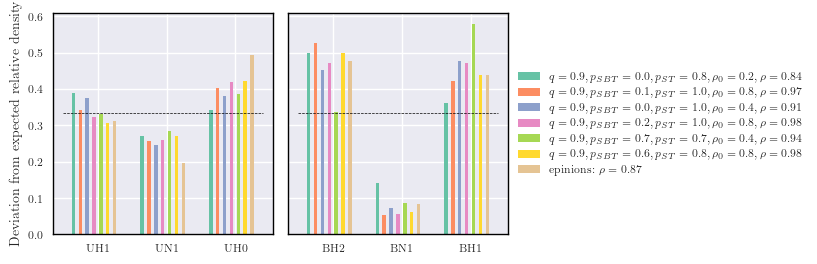

In [191]:
"""Many points
"""


save_ = False
fun_prepare_data = prepare_data4
linewidth = 0.5
addon = "_lvl"
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_group = 0#there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_size = 7
add_real_data = True
show_error = False
show_rho = True

# reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

# triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.8 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
ydata, yerr = fun_prepare_data(df2_erho_correct_g.iloc[inds],  triads_set, 
                               std_data = None, addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
if show_error:
    yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
    yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
else:
    yerr = None
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy() 
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

if add_real_data:
    real_net_data, _ = fun_prepare_data(epinions,  triads_set)
else:
    real_net_data = None

if show_rho:
    rhos = df2_erho_correct_g.iloc[inds].rho.values[group_size*which_group:group_size*(which_group+1)]
    epi_rho = epinions.rho.values[0]
else:
    rhos = None
    epi_rho = None

title = r'$\Delta_1$'
plot_bar_nets(axes[0], ydata, yerr, triads_set, None, labels = None, 
              line_level = line_level, linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4, 
              real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epi_rho)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
ydata, yerr = fun_prepare_data(df2_erho_correct_g.iloc[inds],  triads_set, 
                               std_data = df2_erho_correct_g.iloc[inds], addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
if show_error:
    yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
    yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
else:
    yerr = None
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

if add_real_data:
    real_net_data, _ = fun_prepare_data(epinions,  triads_set)
else:
    real_net_data = None

title = r'$\Delta_2$'

plot_bar_nets(axes[1], ydata, yerr, triads_set, None, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4, 
              real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epi_rho)


# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    if i==1:
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
# print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

fname = 'barplots_epinions_s2000_rhoinit'
# fname = fname + "_down"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_group)

if show_error:
    fname = fname + "_err"
if add_real_data:
    fname = fname + "_real"
if show_rho:
    fname = fname + "_rho"

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 

In [254]:
sets = [(0.9, 0.0, 0.8, 0.0), (0.9, 0.8, 0.6, 0.4), (0.9, 0.8, 0.6, 0.2), 
        (0.925, 0.7, 0.6, 0.2), (0.925, 0.7, 0.6, 0.0)]

sets = [(0.9, 0.8, 0.6, 0.4), (0.9, 0.8, 0.6, 0.2), 
        (0.925, 0.7, 0.6, 0.2), (0.925, 0.7, 0.6, 0.0), (0.85, 0.6, 0.7, 0.4), 
        (0.85, 1.0, 0.5, 0.0), (0.9, 0.4, 0.7, 0.0), (0.925, 0.3, 0.7, 0.0)] 
        # (0.775, 1.0, 0.5, 0.0)]

sets = [(0.9, 0.8, 0.6, 0.4), (0.9, 0.8, 0.6, 0.2), 
        (0.925, 0.7, 0.6, 0.0), (0.85, 0.6, 0.7, 0.4), 
        (0.85, 1.0, 0.5, 0.0), (0.9, 0.4, 0.7, 0.0), (0.925, 0.3, 0.7, 0.0), 
        (0.775, 1.0, 0.5, 0.0)]

inds = get_inds(df2_joined_correct_g, sets)
df2_joined_correct_g.iloc[inds]

q    p   ps  rho_init  repetitions   rho_lvl  \
0.900 0.8 0.6 0.4  0.900  0.8  0.6       0.4            1  0.915134   
              0.2  0.900  0.8  0.6       0.2            1  0.891006   
0.925 0.7 0.6 0.0  0.925  0.7  0.6       0.0            1  0.851985   
0.850 0.6 0.7 0.4  0.850  0.6  0.7       0.4            1  0.913060   
      1.0 0.5 0.0  0.850  1.0  0.5       0.0            1  0.830820   
0.900 0.4 0.7 0.0  0.900  0.4  0.7       0.0            1  0.840841   
0.925 0.3 0.7 0.0  0.925  0.3  0.7       0.0            1  0.842721   
0.775 1.0 0.5 0.0  0.775  1.0  0.5       0.0            1  0.835193   

                   rho_lvl_std  rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  \
0.900 0.8 0.6 0.4          0.0              1  0.915134           0.0  ...   
              0.2          0.0              1  0.891006           0.0  ...   
0.925 0.7 0.6 0.0          0.0              1  0.851985           0.0  ...   
0.850 0.6 0.7 0.4          0.0              1  0.913060           0.0  ...   
      1.0 0.5 0.0          0.0              1  0.830820           0.0  ...   
0.900 0.4 0.7 0.0          0.0              1  0.840841           0.0  ...   
0.925 0.3 0.7 0.0          0.0              1  0.842721           0.0  ...   
0.775 1.0 0.5 0.0          0.0              1  0.835193           0.0  ...   

                   closest_to_six_triads  closest_to_six_triads_transformed  \
0.900 0.8 0.6 0.4               0.005310                           0.010699   
              0.2               0.003697                           0.008505   
0.925 0.7 0.6 0.0               0.001727                           0.008609   
0.850 0.6 0.7 0.4               0.005056                           0.008823   
      1.0 0.5 0.0               0.000820                           0.011800   
0.900 0.4 0.7 0.0               0.001503                           0.009449   
0.925 0.3 0.7 0.0               0.001845                           0.010226   
0.775 1.0 0.5 0.0               0.000774                           0.015972   

                   closest_to_six_triads_corrdevs_transformed  \
0.900 0.8 0.6 0.4                                    0.006890   
              0.2                                    0.008062   
0.925 0.7 0.6 0.0                                    0.007318   
0.850 0.6 0.7 0.4                                    0.007262   
      1.0 0.5 0.0                                    0.010422   
0.900 0.4 0.7 0.0                                    0.008631   
0.925 0.3 0.7 0.0                                    0.009665   
0.775 1.0 0.5 0.0                                    1.015712   

                   closest_to_four_triads_corrdevs_transformed  \
0.900 0.8 0.6 0.4                                     0.006890   
              0.2                                     0.008062   
0.925 0.7 0.6 0.0                                     0.007318   
0.850 0.6 0.7 0.4                                     0.007262   
      1.0 0.5 0.0                                     0.010422   
0.900 0.4 0.7 0.0                                     0.008631   
0.925 0.3 0.7 0.0                                     0.009665   
0.775 1.0 0.5 0.0                                     0.015712   

                   closest_to_six_triads_rho  \
0.900 0.8 0.6 0.4                   0.079833   
              0.2                   0.050445   
0.925 0.7 0.6 0.0                   0.018938   
0.850 0.6 0.7 0.4                   0.075343   
      1.0 0.5 0.0                   0.007907   
0.900 0.4 0.7 0.0                   0.015064   
0.925 0.3 0.7 0.0                   0.014670   
0.775 1.0 0.5 0.0                   0.009260   

                   closest_to_six_triads_rho_transformed  \
0.900 0.8 0.6 0.4                               0.040508   
              0.2                               0.027204   
0.925 0.7 0.6 0.0                               0.015493   
0.850 0.6 0.7 0.4                               0.036937   
      1.0 0.5 0.0                               0.0146

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7]


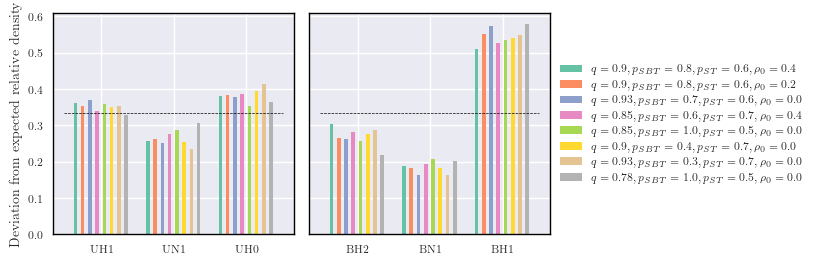

In [256]:
"""Many points
"""


save_ = True
fun_prepare_data = prepare_data4
linewidth = 0.5
addon = "_lvl3"
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
# which_group = 6 #there can be `group_size` bars (8 at max). If data has more, which to show
# group_size = 6

# reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

# triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.8 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
ydata, yerr = fun_prepare_data(df2_joined_correct_g.iloc[inds],  triads_set, 
                               std_data = None, addon = addon)

# ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
# ydata = ydata.loc[:,~ydata.columns.duplicated()].copy() 
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_1$'
plot_bar_nets(axes[0], ydata, None, triads_set, None, labels = None, 
              line_level = line_level, linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
ydata, yerr = fun_prepare_data(df2_joined_correct_g.iloc[inds],  triads_set, 
                               std_data = None, addon = addon)

# ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
# ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_2$'

plot_bar_nets(axes[1], ydata, None, triads_set, None, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4)


# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    if i==1:
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

fname = 'barplots_wiki_rhoinit_new'
# fname = fname + "_down"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_group)

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 

In [222]:
# 0.8, 0.4, 0.9 (looking good overall, best in closest to 4 triads transformed, 6 triads trans, 4 triads corrdev trans, )
# 0.8, 0.7, 0.7 (slightly worse than above, best in closest to 4 triads trans, 6 triads trans, 6 triads corrdev trans, 4 triads corrdev trans, )

sets_g = [(0.8, 0.4, 0.9), (0.8, 0.7, 0.7)]
df2_w1000_g.loc[sets_g]

q    p   ps  repetitions   rho_lvl  rho_lvl_std  rho_lvl_valid  \
0.8 0.4 0.9  0.8  0.4  0.9            1  0.965761          0.0              1   
    0.7 0.7  0.8  0.7  0.7            1  0.963461          0.0              1   

             rho_lvl2  rho_lvl2_std  rho_lvl2_valid  ...  \
0.8 0.4 0.9  0.965761           0.0               1  ...   
    0.7 0.7  0.963461           0.0               1  ...   

             closest_to_four_triads  closest_to_four_triads_transformed  \
0.8 0.4 0.9                0.007137                            0.002214   
    0.7 0.7                0.006283                            0.003106   

             closest_to_six_triads  closest_to_six_triads_transformed  \
0.8 0.4 0.9               0.012661                           0.003949   
    0.7 0.7               0.011340                           0.004401   

             closest_to_six_triads_corrdevs_transformed  \
0.8 0.4 0.9                                    1.002214   
    0.7 0.7                                    1.003106   

             closest_to_four_triads_corrdevs_transformed  \
0.8 0.4 0.9                                     0.002214   
    0.7 0.7                                     0.003106   

             closest_to_six_triads_rho  closest_to_six_triads_rho_transformed  \
0.8 0.4 0.9                   0.158921                               0.062453   
    0.7 0.7                   0.153692                               0.061342   

             closest_to_four_triads_rho  \
0.8 0.4 0.9                    0.153397   
    0.7 0.7                    0.148635   

             closest_to_four_triads_rho_transformed  
0.8 0.4 0.9                                0.060718  
    0.7 0.7                                0.060046  

[2 rows x 50 columns]

[0.  0.1 0.2 0.3 0.4 0.5 0.6]


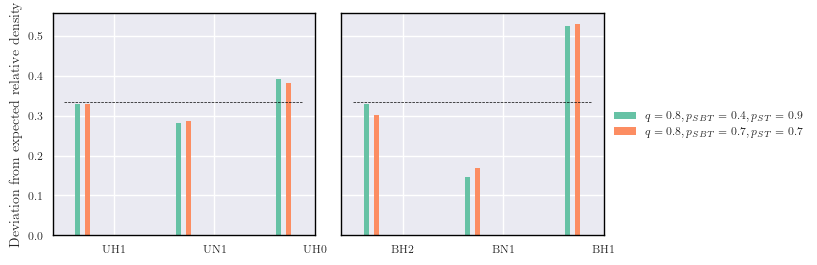

In [257]:
"""Many points
"""


save_ = True
fun_prepare_data = prepare_data4
linewidth = 0.5
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
# which_group = 6 #there can be `group_size` bars (8 at max). If data has more, which to show
# group_size = 6

# reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

# triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.8 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
ydata, yerr = fun_prepare_data(df2_w1000_g.loc[sets_g],  triads_set, std_data = None)

# ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
# ydata = ydata.loc[:,~ydata.columns.duplicated()].copy() 
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_1$'
plot_bar_nets(axes[0], ydata, None, triads_set, None, labels = None, 
              line_level = line_level, linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
ydata, yerr = fun_prepare_data(df2_w1000_g.loc[sets_g],  triads_set, std_data = None)

# ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
# ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_2$'

plot_bar_nets(axes[1], ydata, None, triads_set, None, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5)


# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    if i==1:
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

fname = 'barplots_wiki2_s1000_sim_best_grouped'
fname = fname + "_down"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_group)

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 